In [105]:
import pandas as pd
import numpy as np

from google.cloud import bigquery
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file("C:\\Users\\Joanna Kang\\Documents\\GitHub\\Sales-dashboard\\My First Project-c1aa474eca74.json")
project_id = 'rare-shuttle-279916'

In [106]:
julysale = pd.read_csv("C:\\Users\\Joanna Kang\\Desktop\\TASK\\5. Data Anaylsis\\2020_July_trend\\sales_2020-07-01_2020-07-26.csv")

In [107]:
client = bigquery.Client()

In [108]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [109]:
import google.auth
from google.cloud import bigquery
from google.cloud import bigquery_storage_v1beta1

credentials, your_project_id = google.auth.default(
    scopes=["https://www.googleapis.com/auth/cloud-platform"]
)

# Make clients.
bqclient = bigquery.Client(
    credentials=credentials,
    project= 'rare-shuttle-279916',
)
bqstorageclient = bigquery_storage_v1beta1.BigQueryStorageClient(
    credentials=credentials
)

In [110]:
query_job_1 = client.query('''SELECT * FROM `rare-shuttle-279916.Amazon.productlist_200625` LIMIT 20000
''')
productlist = query_job_1.to_dataframe()

In [111]:
def column_replace(productlist, columns, new_column):
    productlist_before = []
    productlist_new = new_column
    for i in range(len(columns)):
        productlist_before.append(columns[i])

    for i in range(len(new_column)):
        productlist_new.append(new_column[i])

    for i in range(len(productlist_before)):
        productlist = productlist.rename({productlist_before[i] : productlist_new[i]}, axis = 'columns')
    
    productlist = productlist.drop([productlist.index[0]])

    return productlist

productlist = column_replace(productlist, productlist.columns, ['Batch', 'SKU', 'ASIN', 'BARCODE', 'NAME(KR)', 'SKU_2', 'ASIN_2', 'CHARACTER', 'CATEGORY', 'ITEM', 'THEME', 'PRODUCT_NAME(KR)'])

#productlist = productlist.drop([productlist.index[0]])
productlist = productlist.sort_values(by='Batch')

In [112]:
productlist = productlist.drop_duplicates('SKU', keep='last')

In [113]:
productlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 445 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Batch             906 non-null    object
 1   SKU               906 non-null    object
 2   ASIN              708 non-null    object
 3   BARCODE           906 non-null    object
 4   NAME(KR)          906 non-null    object
 5   SKU_2             906 non-null    object
 6   ASIN_2            705 non-null    object
 7   CHARACTER         906 non-null    object
 8   CATEGORY          906 non-null    object
 9   ITEM              906 non-null    object
 10  THEME             906 non-null    object
 11  PRODUCT_NAME(KR)  906 non-null    object
dtypes: object(12)
memory usage: 92.0+ KB


In [114]:
julysale.columns.values[1] = 'SKU'

In [115]:
julysale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_title      1386 non-null   object 
 1   SKU                1386 non-null   object 
 2   day                1386 non-null   object 
 3   pos_location_name  0 non-null      float64
 4   net_quantity       1386 non-null   int64  
 5   gross_sales        1386 non-null   float64
 6   discounts          1386 non-null   float64
 7   returns            1386 non-null   float64
 8   net_sales          1386 non-null   float64
 9   taxes              1386 non-null   float64
 10  total_sales        1386 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 119.2+ KB


In [116]:
julysale = pd.merge(julysale, productlist, how = 'left', on = 'SKU')

In [117]:
julysale

product_title       SKU         day  \
0     Baby Dreaming Theme, Plush Headband - Little A...    F10613  2020-07-24   
1              Happy Weeks, Removable Stickers - Apeach    F10751  2020-07-03   
2      KANGDANIEL EDITION, Plush Keyring - Happy Apeach    F10486  2020-07-01   
3     Happy Weeks, Multi Coloured Pen, 4 Colours & M...    F10761  2020-07-02   
4                       Cake Card - Apeach, Ryan, Frodo  93008556  2020-07-03   
...                                                 ...       ...         ...   
1381                     Silicone Hanging Holder - Ryan    F09645  2020-07-17   
1382                            Metal Pin Badges - Tube  93008640  2020-07-06   
1383            Happy Weeks, Ruled Note - Friday Apeach    F10729  2020-07-06   
1384                          Hoodie Body Pillow - Ryan    F10691  2020-07-13   
1385                      Humidifier Filters, Pack of 3    F08961  2020-07-13   

      pos_location_name  net_quantity  gross_sales  discounts  returns  \
0                   NaN             5        66.60     -26.63     0.00   
1                   NaN             4        17.05      -5.11     0.00   
2                   NaN             4        30.32       0.00     0.00   
3                   NaN             4        26.63      -7.99     0.00   
4                   NaN             4         8.51       0.00     0.00   
...                 ...           ...          ...        ...      ...   
1381                NaN            -1         0.00       0.00    -9.58   
1382                NaN            -1         0.00       0.00    -5.16   
1383                NaN            -1         0.00       0.00    -6.03   
1384                NaN            -1         0.00       0.00   -23.32   
1385                NaN            -2         0.00       0.00    -8.15   

      net_sales  taxes  ...        ASIN        BARCODE             NAME(KR)  \
0         39.97   8.00  ...  B0883BXBYD  8809681706148    베이비드리밍 세안밴드 리틀어피치   
1         11.94   2.03  ...  B084JSM6YB  8809681707459     해피위크 리무버블스티커_어피치   
2         30.32   6.04  ...           0  8809681704632  강다니엘에디션 소프트키링_해피어피치   
3         18.64   3.73  ...  B084JMJSBS  8809681707558  해피위크 4컬러+샤프 멀티펜_어피치   
4          8.51   1.45  ...  B07QVJLFL2  8809641463975       리틀스케치북_카드_생일축하   
...         ...    ...  ...         ...            ...                  ...   
1381      -9.58  -1.91  ...  B07TS2GK3T  8809656137304        실리콘 다용도걸이_라이언   
1382      -5.16  -0.83  ...  B07PZY3C18  8809641465054         프렌즈뱃지_베이직 튜브   
1383      -6.03  -0.96  ...  B084JP5RK5  8809681707237      해피위크 공부노트_금 어피치   
1384     -23.32  -4.67  ...  B084MF4KPN  8809681706940          후디바디필로우_라이언   
1385      -8.15  -1.63  ...        None  8809656130145           프렌즈 가습기 필터   

         SKU_2      ASIN_2          CHARACTER           CATEGORY  \
0       F10613  B0883BXBYD             Apeach               Bath   
1       F10751  B084JSM6YB             Apeach         Stationery   
2       F10486           0             Apeach        Accessories   
3       F10761  B084JMJSBS             Apeach         Stationery   
4     93008556  B07QVJLFL2  Ryan, Apeach, Con         Stationery   
...        ...         ...                ...                ...   
1381    F09645  B07TS2GK3T               Ryan  Kitchen & Laundry   
1382  93008640  B07PZY3C18               Tube        Accessories   
1383    F10729  B084JP5RK5             Apeach         Stationery   
1384    F10691  B084MF4KPN               Ryan             Living   
1385    F08961        None                  -               Home   

                   ITEM           THEME     PRODUCT_NAME(KR)  
0             Hairbands   Baby Dreaming    베이비드리밍 세안밴드 리틀어피치  
1              Stickers     Happy Weeks     해피위크 리무버블스티커_어피치  
2              Keyrings     Kang Daniel  강다니엘에디션 소프트키링_해피어피치  
3                   Pen     Happy Weeks  해피위크 4컬러+샤프 멀티펜_어피치  
4         Message Cards  Little Friends       리틀스케치북_카드_생일축하  
...                 ...             

In [118]:
julysale['day'] = pd.to_datetime(julysale['day'])

In [119]:
julysale['dayofweek'] = julysale['day'].dt.week
julysale['year'] = julysale['day'].dt.year
julysale['month'] = julysale['day'].dt.month


In [120]:
julysale = julysale.loc[julysale['month'].isin([7])]
julysale

product_title       SKU        day  \
0     Baby Dreaming Theme, Plush Headband - Little A...    F10613 2020-07-24   
1              Happy Weeks, Removable Stickers - Apeach    F10751 2020-07-03   
2      KANGDANIEL EDITION, Plush Keyring - Happy Apeach    F10486 2020-07-01   
3     Happy Weeks, Multi Coloured Pen, 4 Colours & M...    F10761 2020-07-02   
4                       Cake Card - Apeach, Ryan, Frodo  93008556 2020-07-03   
...                                                 ...       ...        ...   
1381                     Silicone Hanging Holder - Ryan    F09645 2020-07-17   
1382                            Metal Pin Badges - Tube  93008640 2020-07-06   
1383            Happy Weeks, Ruled Note - Friday Apeach    F10729 2020-07-06   
1384                          Hoodie Body Pillow - Ryan    F10691 2020-07-13   
1385                      Humidifier Filters, Pack of 3    F08961 2020-07-13   

      pos_location_name  net_quantity  gross_sales  discounts  returns  \
0                   NaN             5        66.60     -26.63     0.00   
1                   NaN             4        17.05      -5.11     0.00   
2                   NaN             4        30.32       0.00     0.00   
3                   NaN             4        26.63      -7.99     0.00   
4                   NaN             4         8.51       0.00     0.00   
...                 ...           ...          ...        ...      ...   
1381                NaN            -1         0.00       0.00    -9.58   
1382                NaN            -1         0.00       0.00    -5.16   
1383                NaN            -1         0.00       0.00    -6.03   
1384                NaN            -1         0.00       0.00   -23.32   
1385                NaN            -2         0.00       0.00    -8.15   

      net_sales  taxes  ...     SKU_2      ASIN_2          CHARACTER  \
0         39.97   8.00  ...    F10613  B0883BXBYD             Apeach   
1         11.94   2.03  ...    F10751  B084JSM6YB             Apeach   
2         30.32   6.04  ...    F10486           0             Apeach   
3         18.64   3.73  ...    F10761  B084JMJSBS             Apeach   
4          8.51   1.45  ...  93008556  B07QVJLFL2  Ryan, Apeach, Con   
...         ...    ...  ...       ...         ...                ...   
1381      -9.58  -1.91  ...    F09645  B07TS2GK3T               Ryan   
1382      -5.16  -0.83  ...  93008640  B07PZY3C18               Tube   
1383      -6.03  -0.96  ...    F10729  B084JP5RK5             Apeach   
1384     -23.32  -4.67  ...    F10691  B084MF4KPN               Ryan   
1385      -8.15  -1.63  ...    F08961        None                  -   

               CATEGORY               ITEM           THEME  \
0                  Bath          Hairbands   Baby Dreaming   
1            Stationery           Stickers     Happy Weeks   
2           Accessories           Keyrings     Kang Daniel   
3            Stationery                Pen     Happy Weeks   
4            Stationery      Message Cards  Little Friends   
...                 ...                ...             ...   
1381  Kitchen & Laundry    Silicone Holder           Basic   
1382        Accessories          Pin badge           Basic   
1383         Stationery           Notepads     Happy Weeks   
1384             Living        Body Pillow           Basic   
1385               Home  Humidifier Filter           Basic   

         PRODUCT_NAME(KR) dayofweek  year month  
0       베이비드리밍 세안밴드 리틀어피치        30  2020     7  
1        해피위크 리무버블스티커_어피치        27  2020     7  
2     강다니엘에디션 소프트키링_해피어피치        27  2020     7  
3     해피위크 4컬러+샤프 멀티펜_어피치        27  2020     7  
4          리틀스케치북_카드_생일축하        27  2020     7  
...                   ...       ...   ...   ...  
1381        실리콘 다용도걸이_라이언        29  2020     7  
1382         프렌즈뱃지_베이직 튜브        28  2020     7  
1383      해피위크 공부노트_금 어피치        28  2020     7  
1384          후디바디필로우_라이언        29  2020     7  
1385           프렌즈 가습기 필터       

In [121]:
julysale.loc[julysale['CATEGORY'] == 'Stationeries', 'CATEGORY'] = 'Stationery'
julysale.loc[julysale['CHARACTER'] == 'All', 'CHARACTER'] = 'Together'

In [160]:
theme_overall = pd.pivot_table(julysale, index = 'THEME', columns=['dayofweek'], values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins=False)
theme_overall = theme_overall.sort_values(by = 30, ascending= False)
theme_overall

dayofweek          27  28  29   30
THEME                             
Happy Weeks        68  54  70  113
Little Friends     73  63  52  111
Baby Dreaming      43  44  17   63
Basic              69  38  22   55
Lemon Terras       31  25  21   45
Lovely Apeach      16  13   9   19
Yamyam Friends     10   5  11   17
Winter Wonderland   2   2   6   14
Cheeze Friends      3   3   2   10
Pompom Friends      7  10   7    8
Kang Daniel        36  14   4    8
Heart Apeach        9   6   2    8
Forest Ryan         4   6   2    6
Lazy Sunday         3   3   2    3
Lovely Ryan         4   1   3    2
Honey Friends       0   5   0    1
Little friends      1   3   0    1
Gentlemen Ryan      0   0   0    1
Autumn Story        5   4   5    1
Twice               2   1   1    0
Battle Ground       1   0   0    0

In [123]:
theme_sale = pd.pivot_table(julysale, index = ['THEME', 'CATEGORY', 'ITEM', 'product_title'], columns = ['dayofweek'], values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)
theme_sale

dayofweek                                                                                            27  \
THEME          CATEGORY    ITEM                 product_title                                             
Autumn Story   Plush       Plush Toys           Autumn Story Plush Set - Squirrel Family              4   
               Stationery  Sticky Notes & Memos Autumn Story Memo - Acorn                             1   
Baby Dreaming  Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan                0   
                           Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Apeach    0   
                                                Baby Dreaming Theme, Plush Keyring - Little Muzi      0   
...                                                                                                 ...   
Yamyam Friends Tech&Accs   Airpods case         Yumyum Friends, AirPods Case- Little Jay-G            1   
                                                Yumyum Friends, AirPods Case- Little Ryan             3   
                                                Yumyum Friends, AirPods Pro Case - Little Apeach      0   
                                                Yumyum Friends, AirPods Pro Case - Little Ryan        0   
All                                                                                                 387   

dayofweek                                                                                            28  \
THEME          CATEGORY    ITEM                 product_title                                             
Autumn Story   Plush       Plush Toys           Autumn Story Plush Set - Squirrel Family              2   
               Stationery  Sticky Notes & Memos Autumn Story Memo - Acorn                             2   
Baby Dreaming  Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan                1   
                           Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Apeach    0   
                                                Baby Dreaming Theme, Plush Keyring - Little Muzi      1   
...                                                                                                 ...   
Yamyam Friends Tech&Accs   Airpods case         Yumyum Friends, AirPods Case- Little Jay-G            0   
                                                Yumyum Friends, AirPods Case- Little Ryan             1   
                                                Yumyum Friends, AirPods Pro Case - Little Apeach      0   
                                                Yumyum Friends, AirPods Pro Case - Little Ryan        0   
All                                                                                                 300   

dayofweek                                                                                            29  \
THEME          CATEGORY    ITEM                 product_title                                             
Autumn Story   Plush       Plush Toys           Autumn Story Plush Set - Squirrel Family              2   
               Stationery  Sticky Notes & Memos Autumn Story Memo - Acorn                             3   
Baby Dreaming  Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan                0   
                           Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Apeach    1   
                                                Baby Dreaming Theme, Plush Keyring - Little Muzi      0   
...                                                                                                 ...   
Yamyam Friends Tech&Accs   Airpods case         Yumyum Friends, AirPods Case- Little Jay-G            0   
                                                Yumyum Friends, AirPods Case- Little Ryan             0   
                                                Yumyum Friends, AirPods Pro Case - Little Apeach      0   
                                       

In [165]:
littlefriends = theme_sale.query("THEME == ['Little Friends']").head(50)
littlefriends.sort_values(by=30, ascending= False)
littlefriends.loc[littlefriends[30].isnull()]

Empty DataFrame
Columns: [27, 28, 29, 30, All]
Index: []

In [126]:
Happyweeks = theme_sale.query("THEME == ['Happy Weeks']").head(50)
Happyweeks.sort_values(by =29, ascending= False)

ach        0   
                                             Happy Weeks, PVC Cover Ruled Notepad - Ryan          0   
            Accessories Socks                Low Cut Socks - Ryan & Apeach                        2   
            Stationery  Message Cards        Happy Weeks, Message Card - Apeach                   0   
            Accessories Socks                Socks, Board - Ryan                                  2   
            Stationery  Notepads             Happy Weeks, Ruled Note - Monday Muzi                1   
            Accessories Socks                Low Cut Socks - Muzi & Tube                          0   
            Stationery  Notepads             Happy Weeks, Ruled Note - Wednesday Neo              0   
                                             Happy Weeks, Wirebound Notepad - Apeach              1   
                        Pen                  Happy Weeks, Ballpoint Pen Set, 0.7mm Black ink...   3   
                                             Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   1   
                        Stickers             Happy Weeks, Diary Decoration Sticker                3   
                                             Happy Weeks, Face Stickers - Ryan, Tube              1   
                        Pen                  Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   2   
                        Notepads             Happy Weeks, A5 Ringbound Notepad - Ryan             1   
                                             Happy Weeks, A5 Ringbound Notepad - Frodo            0   
            Accessories Socks                Low Cut Socks - Ryan & Con                           0   
                                             Socks, Tulip - Apeach                                0   
            Stationery  Letter set           Happy Weeks, Letters and Envelopes Sets - Apeach     1   
                        Desk Mat             Happy Weeks, Desk Mat - Apeach                       2   
                        Index Folder         Happy Weeks, Document Index file - Ryan              0   
                        Pen                  Happy Weeks, Ballpoint Pen Set, 0.7mm Black ink...   1   
                        Stickers             Happy Weeks, Removable Stickers - Apeach             2   
                        Book Stand           Happy Weeks, Book Stand- Ryan, Frodo                 0   
                        Stickers             Happy Weeks, Face Stickers - Apeach, Muzi            2   
                        Corner Pocket        Happy Weeks, Paper Pocket - Apeach                   0   
                        Pen                  Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   0   
                        Desk Mat             Happy Weeks, Desk Mat - Ryan                         0   
                        Index Folder         Happy Weeks, Document Index file - Apeach            1   
                        Notepads             Happy Weeks, Notepad - Muzi & Con                    0   
                        Index Folder         Happy Weeks, Document Index file - Muzi              0   
                        Notepads             Happy Weeks, Ruled Note - Tuesday Frodo              0   
                        Index Folder         Happy Weeks, Zipper File Folder - Apeach             0   
                                             Happy Weeks, Zipper File Folder - Ryan               0   
                        Letter set           Happy Weeks, Letters and Envelopes Sets - Ryan       1   
                        Message Cards        Happy Weeks, Message Card - Muzi                     0   
                        Mouse Pad            Happy Weeks, Mouse Pad - Apeach                      1   
                        Notepads             Happy Weeks, Notepad - Ryan                          0   
            Tech&Accs   Airpods case         Happy Weeks, AirPods Case - Apeach                   4   

dayofweek                                                            

In [127]:
babydreaming = theme_sale.query("THEME == ['Baby Dreaming']").head(50)
babydreaming.sort_values(by =29, ascending= False)

ng Theme, Makeup Blender  -  Apeach       3   
                          Hair Rollers         Baby Dreaming Theme, Hair Roller - Apeach            0   
                          Hair Velcro          Baby Dreaming Theme, Hair Velcro, Pack of 2 - L...   2   
                          Mirrors              Baby Dreaming Theme, Compact Glitter Mirror - L...   0   
                                               Baby Dreaming Theme, Compact Glitter Mirror - L...   0   
              Living      Pyjamas              Baby Dreaming Theme, Kids Pyjama - Little Apeach     1   
                                               Baby Dreaming Theme, Pyjama Dress - Little Ryan      0   
                                               Baby Dreaming Theme, Pyjama Set - Little Apeach      0   
              Plush       Mini Pillow          Baby Dreaming Theme, Mini Pillow - Little Frodo      2   
              Tech&Accs   Phone Cases          Baby Dreaming Theme, iPhone Case with Strap X/X...   0   
              Bath        Hairbands            Baby Dreaming Theme, Plush Headband - Little Ryan    2   

dayofweek                                                                                          28  \
THEME         CATEGORY    ITEM                 product_title                                            
Baby Dreaming Plush       Plush Toys           Baby Dreaming Theme, Plush - Little Ryan             5   
              Accessories Pouches              Baby Dreaming Theme, Cosmetic Pouch - Little Ap...   0   
              Plush       Mini Pillow          Baby Dreaming Theme, Mini Pillow - Little Apeach     0   
              Beauty      Hair Velcro          Baby Dreaming Theme, Hair Velcro, Pack of 2 - L...   0   
              Accessories Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Ryan     1   
              Stationery  Stickers             Baby Dreaming Theme, Decoration Sticker - Pink       1   
              Plush       Plush Toys           Baby Dreaming Theme, Plush - Little Apeach           0   
              Accessories Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Apeach   0   
              Beauty      Brush                Baby Dreaming Theme, Hair Brush - Apeach             1   
              Stationery  Masking Tape         Baby Dreaming Theme, Masking Tape, Pack of 2         0   
                          Pen                  Baby Dreaming Theme, Double Sided Highlighters,...   1   
                          Stickers             Baby Dreaming Theme, Decoration Sticker - Blue       1   
              Plush       Plush Toys           Baby Dreaming Theme, Plush - Little Tube             0   
              Tech&Accs   Phone Cases          Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   1   
              Stationery  Stickers             Baby Dreaming Theme, Day Index Sticker               0   
                                               Baby Dreaming Theme, Index Sticker                   0   
              Tech&Accs   Phone Cases          Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   2   
              Stationery  Sticky Notes & Memos Baby Dreaming Theme, Pen Holder & Memo               1   
              Plush       Plush Toys           Baby Dreaming Theme, Plush - Little Neo              0   
              Tech&Accs   Airpods Keyring      Baby Dreaming Theme, Keyring - Little Apeach         1   
                                               Baby Dreaming Theme, Keyring - Little Ryan           1   
                          Airpods case         Baby Dreaming Theme, Glitter AirPods Case - Lit...   1   
                                               Baby Dreaming Theme, Glitter AirPods Case - Lit...   1   
                          Phone Cases          Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   0   
              Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan               1   
              Plush       Mini Pillow          Baby Dreaming Theme,

In [128]:
basic = theme_sale.query("THEME == ['Basic']").head(50)
basic.sort_values(by = 29, ascending= False)

uch - Apeach                               0   
                        Phone Cases               Popsockets - Ryan                                 1   
      Plush             Plush Toys                Plush - Frodo                                     0   
                                                  Plush - Muzi                                      0   
                                                  Plush - Neo                                       0   
                                                  Plush - Tube                                      0   
      Tech&Accs         Phone Cases               Phonecase ( iPhone 11 / iPhone 11 Pro) - Con      1   
                        Airpods Pouch             Mini Pouch - Ryan                                 3   
      Stationery        Pen                       Spinning Retractable Gel Pen - Ryan               4   
      Tech&Accs         Airpods case              AirPods Case Cover with Keyring - Apeach          0   
      Plush             Plush Toys                Plush - Apeach                                    0   
      Summer            Inflatables & Pool Floats Swim Ring (Ryan)                                  0   
                                                  Swim Ring (Apeach)                                0   
      Plush             Body Pillow               Soft Body Pillow - Frodo                          0   
                        Face Cushions             Soft Face Cushion - Jay-G                         0   
                        Body Pillow               Soft Body Pillow - Apeach                         1   
      Accessories       Pin badge                 Metal Pin Badges - Frog Tube                      0   
                                                  Metal Pin Badges - Peach Apeach                   0   
                        Plush Keyring             Mini Face Plush Keyring - Apeach                  1   
                                                  Mini Face Plush Keyring - Muzi                    1   
                                                  Mini Face Plush Keyring - Ryan                    0   
      Bath              Toothbrush                Toothbrush with Brush Case - Con                  1   
                                                  Toothbrush with Brush Case - Ryan                 2   
      Home              Fans                      Portable Fan with Cradle Stand - Apeach          -1   
                                                  Portable Fan with Cradle Stand - Ryan            -1   
      Kitchen & Laundry Trivet                    Silicone Trivet - Apeach                          0   
      Living            Mugs                      Basic Black Mug - Ryan                            0   
                                                  Basic White Mug - Ryan                            1   
      Plush             Body Pillow               Hoodie Body Pillow - Apeach                       1   
                                                  Hoodie Body Pillow - Muzi & Con                   2   
      Tech&Accs         Selfie Stick              Selfie Stick - Little Apeach                      0   
      Home              Desk Humidifier           Humidifier - Ryan                                 2   
                                                  Humidifier - Apeach                               2   
      Living            Body Pillow               Hoodie Body Pillow - Ryan                         4   
      Home              Humidifier Filter         Humidifier Filters, Pack of 3                     3   

dayofweek                                                                                          29  \
THEME CATEGORY          ITEM                      product_title                                         
Basic Plush             Body Pillow               Soft Body Pillow - Ryan                           5   
      Accessories       Keyrings                  Keyring - Ryan (

In [129]:
lemonterrace = theme_sale.query("THEME == ['Lemon Terras']").head(50)
lemonterrace.sort_values(by = 29, ascending= False)

dayofweek                                                                                27  \
THEME        CATEGORY    ITEM                 product_title                                   
Lemon Terras Plush       Face Cushions        Lemon Terrace, Face Cushion - Ryan          2   
             Accessories Canvas bag           Yumyum Friends, Tote bag - Little Apeach    4   
             Plush       Plush Toys           Lemon Terrace, Plush - Apeach               2   
             Bath        Hairbands            Lemon Terrace, Headband - Apeach            3   
             Plush       Face Cushions        Lemon Terrace, Face Cushion - Apeach        2   
             Stationery  Sticky Notes & Memos Lemon Terrace, Sticky Note - Apeach         0   
             Accessories Hair Tie             Lemon Terrace, Hair Tie - Ryan              3   
                         Plush Keyring        Lemon Terrace, Plush Keyring - Con          0   
                         Socks                Low Cut Socks - Ryan & Apeach & Con         0   
             Stationery  Pencil Cases         Lemon Terrace, Pencil Case                  0   
                         Notepads             Lemon Terrace, Notepad & Pen Set - Ryan     0   
                                              Lemon Terrace, Notepad & Pen Set - Apeach   1   
                         Clip board           Lemon Terrace, A4 Clipboard                 0   
             Plush       Plush Toys           Lemon Terrace, Plush - Ryan                 4   
             Living      Pyjamas              Lemon Terrace, Pyjama Set - Apeach          2   
                                              Lemon Terrace, Pyjama Set - Ryan            1   
             Accessories Canvas bag           Yumyum Friends, Tote bag - Little Jay-G     1   
             Living      Pyjamas              Lemon Terrace, Pyjama Dress - Apeach        0   
             Bath        Bathrobes            Lemon Terrace, Tube Bathrobe                1   
             Accessories Socks                Low Cut Socks - Ryan & Con                  1   
                         Pouches              Lemon Terrace, Face Pouch - Ryan            1   
                                              Lemon Terrace, Face Pouch - Apeach          0   
                         Hair Tie             Lemon Terrace, Hair Tie - Apeach            2   
             Stationery  Sticky Notes & Memos Lemon Terrace, Sticky Note - Ryan           1   

dayofweek                                                                                28  \
THEME        CATEGORY    ITEM                 product_title                                   
Lemon Terras Plush       Face Cushions        Lemon Terrace, Face Cushion - Ryan          2   
             Accessories Canvas bag           Yumyum Friends, Tote bag - Little Apeach    4   
             Plush       Plush Toys           Lemon Terrace, Plush - Apeach               4   
             Bath        Hairbands            Lemon Terrace, Headband - Apeach            2   
             Plush       Face Cushions        Lemon Terrace, Face Cushion - Apeach        3   
             Stationery  Sticky Notes & Memos Lemon Terrace, Sticky Note - Apeach         0   
             Accessories Hair Tie             Lemon Terrace, Hair Tie - Ryan              3   
                         Plush Keyring        Lemon Terrace, Plush Keyring - Con          0   
                         Socks                Low Cut Socks - Ryan & Apeach & Con         0   
             Stationery  Pencil Cases         Lemon Terrace, Pencil Case                  0   
                         Notepads             Lemon Terrace, Notepad & Pen Set - Ryan     1   
                                              Lemon Terrace, Notepad & Pen Set - Apeach   0   
                         Clip board           Lemon Terrace, A4 Clipboard                 1   
             Plush       Plush Toys           Lemon Terrace, Plush - Ryan                 0   
         

In [130]:
Yamyam = theme_sale.query("THEME == ['Yamyam Friends']").head(50)
Yamyam.sort_values(by = 29, ascending= False)

dayofweek                                                                                          27  \
THEME          CATEGORY          ITEM            product_title                                          
Yamyam Friends Accessories       Canvas bag      Yumyum Friends, Mini Tote bag - Little Apeach      0   
                                 Pouches         Yumyum Friends, Pouch - Little Apeach              2   
               Kitchen & Laundry Trivet          Yumyum Friends, Trivet - Little Ryan               0   
               Living            Coin Wallets    Yumyum Friends, Coin Wallet - Little Apeach        0   
               Tech&Accs         Airpods case    Yumyum Friends, AirPods Case- Little Apeach        0   
                                                 Yumyum Friends, AirPods Case - Little Tube         0   
                                 Airpods Keyring Yumyum Friends, Keyring - Little Ryan              0   
               Living            Coin Wallets    Yumyum Friends, Coin Wallet - Little Ryan          2   
               Tech&Accs         Airpods Keyring Yumyum Friends, Keyring - Little Apeach            0   
               Kitchen & Laundry Trivet          Yumyum Friends, Trivet - Little Apeach             0   
               Accessories       Pouches         Yumyum Friends, Pouch - Little Ryan                1   
                                 Canvas bag      Yumyum Friends, Mini bag - Little Apeach           0   
               Tech&Accs         Airpods case    Yumyum Friends, AirPods Case- Little Jay-G         1   
                                                 Yumyum Friends, AirPods Case- Little Ryan          3   
                                                 Yumyum Friends, AirPods Pro Case - Little Apeach   0   
                                                 Yumyum Friends, AirPods Pro Case - Little Ryan     0   
               Accessories       Canvas bag      Yumyum Friends, Mini Tote bag - Little Ryan        1   

dayofweek                                                                                          28  \
THEME          CATEGORY          ITEM            product_title                                          
Yamyam Friends Accessories       Canvas bag      Yumyum Friends, Mini Tote bag - Little Apeach      1   
                                 Pouches         Yumyum Friends, Pouch - Little Apeach              0   
               Kitchen & Laundry Trivet          Yumyum Friends, Trivet - Little Ryan               0   
               Living            Coin Wallets    Yumyum Friends, Coin Wallet - Little Apeach        0   
               Tech&Accs         Airpods case    Yumyum Friends, AirPods Case- Little Apeach        0   
                                                 Yumyum Friends, AirPods Case - Little Tube         0   
                                 Airpods Keyring Yumyum Friends, Keyring - Little Ryan              0   
               Living            Coin Wallets    Yumyum Friends, Coin Wallet - Little Ryan          3   
               Tech&Accs         Airpods Keyring Yumyum Friends, Keyring - Little Apeach            0   
               Kitchen & Laundry Trivet          Yumyum Friends, Trivet - Little Apeach             0   
               Accessories       Pouches         Yumyum Friends, Pouch - Little Ryan                0   
                                 Canvas bag      Yumyum Friends, Mini bag - Little Apeach           0   
               Tech&Accs         Airpods case    Yumyum Friends, AirPods Case- Little Jay-G         0   
                                                 Yumyum Friends, AirPods Case- Little Ryan          1   
                                                 Yumyum Friends, AirPods Pro Case - Little Apeach   0   
                                                 Yumyum Friends, AirPods Pro Case - Little Ryan     0   
               Accessories       Canvas bag      Yumyum Friends, Mini Tote bag - Little Ryan        0   

dayofwee

In [131]:
category_overall = pd.pivot_table(julysale,index = ['CATEGORY'], columns = ['dayofweek'], values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = False)
category_overall = category_overall.sort_values(by = 28, ascending=False)
category_overall

dayofweek          27  28  29   30
CATEGORY                          
Accessories        86  65  54   91
Stationery         98  50  66  132
Tech&Accs          46  50  36   74
Living             41  42  22   53
Plush              61  40  34   61
Bath               12  17   3   12
Beauty             10  15   5   19
Home               10  13   2    9
Travel             14   8   7   17
Kitchen & Laundry   0   0   3   12
Pet                 3   0   0    0
Summer              0   0   0    3
Toys                3   0   1    3
Winter              3   0   3    0

In [132]:
category_sale = pd.pivot_table(julysale,index = ['CATEGORY', 'ITEM', 'NAME(KR)', 'product_title' ], columns = 'dayofweek', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)

In [133]:
category_sale  = category_sale.sort_values(by = 29, ascending = False)
category_sale

dayofweek                                                                                        27  \
CATEGORY    ITEM                 NAME(KR)          product_title                                      
All                                                                                             387   
Stationery  Notepads             해피위크 A5 스프링노트_어피치 Happy Weeks, A5 Ringbound Notepad - Apeach     3   
            Sticky Notes & Memos 해피위크 점착메모세트       Happy Weeks, Sticky Note Set                   6   
Plush       Face Cushions        레몬테라스 얼굴쿠션_라이언    Lemon Terrace, Face Cushion - Ryan             2   
            Body Pillow          리틀바디필로우_라이언       Soft Body Pillow - Ryan                        3   
...                                                                                             ...   
Home        Desk Humidifier      어피치 가습기           Humidifier - Apeach                            4   
                                 라이언 가습기           Humidifier - Ryan                              0   
Living      Body Pillow          후디바디필로우_라이언       Hoodie Body Pillow - Ryan                      5   
Accessories Canvas bag           얌얌 미니 에코백_리틀라이언   Yumyum Friends, Mini Tote bag - Little Ryan    1   
Home        Humidifier Filter    프렌즈 가습기 필터        Humidifier Filters, Pack of 3                  1   

dayofweek                                                                                        28  \
CATEGORY    ITEM                 NAME(KR)          product_title                                      
All                                                                                             300   
Stationery  Notepads             해피위크 A5 스프링노트_어피치 Happy Weeks, A5 Ringbound Notepad - Apeach     2   
            Sticky Notes & Memos 해피위크 점착메모세트       Happy Weeks, Sticky Note Set                  -1   
Plush       Face Cushions        레몬테라스 얼굴쿠션_라이언    Lemon Terrace, Face Cushion - Ryan             2   
            Body Pillow          리틀바디필로우_라이언       Soft Body Pillow - Ryan                        0   
...                                                                                             ...   
Home        Desk Humidifier      어피치 가습기           Humidifier - Apeach                            2   
                                 라이언 가습기           Humidifier - Ryan                              2   
Living      Body Pillow          후디바디필로우_라이언       Hoodie Body Pillow - Ryan                      4   
Accessories Canvas bag           얌얌 미니 에코백_리틀라이언   Yumyum Friends, Mini Tote bag - Little Ryan    0   
Home        Humidifier Filter    프렌즈 가습기 필터        Humidifier Filters, Pack of 3                  3   

dayofweek                                                                                        29  \
CATEGORY    ITEM                 NAME(KR)          product_title                                      
All                                                                                             236   
Stationery  Notepads             해피위크 A5 스프링노트_어피치 Happy Weeks, A5 Ringbound Notepad - Apeach     5   
            Sticky Notes & Memos 해피위크 점착메모세트       Happy Weeks, Sticky Note Set                   5   
Plush       Face Cushions        레몬테라스 얼굴쿠션_라이언    Lemon Terrace, Face Cushion - Ryan             5   
            Body Pillow          리틀바디필로우_라이언       Soft Body Pillow - Ryan                        5   
...                                                                                             ...   
Home        Desk Humidifier      어피치 가습기           Humidifier - Apeach                           -1   
                                 라이언 가습기           Humidifier - Ryan                             -1   
Living      Body Pillow          후디바디필로우_라이언       Hoodie Body Pillow - Ryan                     -1   
Accessories Canvas bag           얌얌 미니 에코백_리틀라이언   Yumyum Friends, Mini Tote bag - Little Ryan   -1   
Home        Humidifier Filter    프렌즈 가습기 필터        Humidifier Filters, Pack of 3    

In [134]:
category_sale.query("CATEGORY == ['Accessories']").head(50)

피규어키링-어피치블라썸         Keyring - Apeach (Peach Ver.)                        0   
            Pin badge       프렌즈뱃지_베이직 튜브         Metal Pin Badges - Tube                             -1   
            Socks           프렌즈스토리삭스(여성)_춘곤증     Low Cut Socks - Muzi & Tube                          0   
                            프렌즈스토리삭스(여성)_방콕타임    Low Cut Socks - Ryan & Con                           0   
                            프렌즈스토리삭스(여성)_레몬프렌즈   Low Cut Socks - Ryan & Apeach & Con                  0   
            Plush Keyring   레몬테라스 미니키체인_콘        Lemon Terrace, Plush Keyring - Con                   0   
            Socks           프렌즈미디움삭스(공용)_튤립어피치   Socks, Tulip - Apeach                                0   
                            윈터원더랜드 양말기프트세트(3p)   Winter Wonderland Collection, Socks Gift Set, P...   0   
            Plush Keyring   미니페이스키링_리틀콘          Mini Face Plush Keyring - Little Con                 0   
            Pouches         레이지 파우치_ivory        Lazy Sunday Pouch (Little Muzi)                      1   
            Plush Keyring   폼폼프렌즈 미니키체인_곰돌이라이언   Plush Keyring - Pompom Friends, Polarbear Ryan       0   
                            베이비드리밍 드림키체인_라이언     Baby Dreaming Theme, Plush Keyring - Little Ryan     1   
                            윈터원더랜드 미니키체인_라이언     Winter Wonderland Collection, Key Chain - Ryan       0   
            Coin Wallets    동전지갑-리틀라이언           Coin Wallet - Little Ryan                            0   
            Plush Keyring   베이비드리밍 드림키체인_어피치     Baby Dreaming Theme, Plush Keyring - Little Apeach   0   
            Card Wallets    목걸이카드지갑-리틀라이언        Foldable Card ID Wallet with Neck Strap - Ryan       4   
                            베이직카드지갑 라이언          Basic Card Holder - Ryan                             0   
            Plush Keyring   강다니엘에디션 페이스키체인_냥이r   KANGDANIEL EDITION, Plush Keyring - Kitten Rooney    1   
                            강다니엘에디션 페이스키체인_냥이p   KANGDANIEL EDITION, Plush Keyring - Kitten Peter     1   
            Card Wallets    목걸이카드지갑-리틀어피치        Foldable Card ID Wallet with Neck Strap - Apeach     3   
            Pin badge       프렌즈뱃지_어피치블라썸         Metal Pin Badges - Peach Apeach                      0   
            Plush Keyring   강다니엘에디션 페이스키체인_냥이O   KANGDANIEL EDITION, Plush Keyring - Kitten Ori       0   
            Pin badge       프렌즈뱃지_개구리 튜브         Metal Pin Badges - Frog Tube                         0   
                            트와이스에디션 핀뱃지_지효       TWICE Edition, Metal Pin Badges - Jihyo + Neo        0   
                            강다니엘에디션 핀뱃지세트(2p)    KANGDANIEL EDITION, Pin Badge - Apeach               0   
            Plush Keyring   미니페이스키링_라이언          Mini Face Plush Keyring - Ryan                       0   
                            베이비드리밍 드림키체인_무지      Baby Dreaming Theme, Plush Keyring - Little Muzi     1   
            Canvas bag      얌얌 미니백_리틀어피치         Yumyum Friends, Mini bag - Little Apeach             0   
            Plush Keyring   미니페이스키링_어피치          Mini Face Plush Keyring - Apeach                     1   
            Canvas bag      얌얌 에코백_리틀제이지         Yumyum Friends, Tote bag - Little Jay-G              0   
            Plush Keyring   미니페이스키링_무지           Mini Face Plush Keyring - Muzi                       1   

dayofweek                                                                                            29  \
CATEGORY    ITEM            NAME(KR)             product_title                                            
Accessories Socks           프렌즈미디움삭스(공용)_네이비라이언  Socks, Navy - Ryan                                   4   
            Canvas bag      얌얌 에코백_리틀어피치         Yumyum Friends, Tote bag - Little Apeach             4   
            Socks           프렌즈미디움삭스(공용)_해피위크    Socks, Happy Week - Muzi & Con & Ryan                3   
                            프렌즈미디움삭스(공용)_해피토요일   Socks, Happy Saturday - Ryan & Con                   3   
            Canvas bag      얌얌 미니 에코백_리틀어피치      Yumyum Friends, Min

In [135]:
category_sale.query("CATEGORY == ['Stationery']").head(50)

해피위크 4컬러+샤프 멀티펜_어피치      Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   2   
                                해피위크 모나미153(4개)_어피치와 친구들 Happy Weeks, Ballpoint Pen Set, 0.7mm Black ink...   3   
           Pencil               러블리어피치 연필 (B심) 6P        Pencils (Pack of 6, B grade) - Lovely Apeach         0   
           Pencil Cases         글리터 필통_복숭아 러블리어피치        Glitter pencil case - Peach Apeach                   0   
                                리틀프렌즈전신필통_어피치            Plush Pencil Case - Apeach                           0   
           Stickers             베이비드리밍 클리어데코스티커_블루       Baby Dreaming Theme, Decoration Sticker - Blue       1   
                                베이비드리밍 클리어데코스티커_핑크       Baby Dreaming Theme, Decoration Sticker - Pink       1   
                                해피위크 다이어리데코스티커           Happy Weeks, Diary Decoration Sticker                3   
                                해피위크 페이스스티커_라이언&튜브       Happy Weeks, Face Stickers - Ryan, Tube              1   
           Sticky Notes & Memos 레몬테라스 점착메모_어피치           Lemon Terrace, Sticky Note - Apeach                  0   
                                미니 체크리스트_러블리어피치          Mini Checklist - Apeach                              1   
                                베이비드리밍 펜홀더 메모지세트         Baby Dreaming Theme, Pen Holder & Memo               1   
                                미니 체크리스트_러블리라이언          Mini Checklist - Ryan                                0   
                                레몬테라스 점착메모_라이언           Lemon Terrace, Sticky Note - Ryan                    0   
           Stickers             귀염귀염스티커_리틀네오             Decoration Sticker - Little Neo                      1   
           Pen                  형광펜 3색_리틀라이언세트           Retractable Highlighters Pen Set - Little Ryan       0   
                                형광펜 3색_리틀어피치세트           Retractable Highlighters Pen Set - Little Apeach     0   
           Pencil Cases         글리터 필통_유니콘 러블리어피치        Glitter pencil case - Unicorn Apeach                 0   

dayofweek                                                                                                    29  \
CATEGORY   ITEM                 NAME(KR)                 product_title                                            
Stationery Notepads             해피위크 A5 스프링노트_어피치        Happy Weeks, A5 Ringbound Notepad - Apeach           5   
           Sticky Notes & Memos 해피위크 점착메모세트              Happy Weeks, Sticky Note Set                         5   
                                어텀스토리 와글와글 떡메모지_도토리      Autumn Story Memo - Acorn                            3   
           Stickers             해피위크 리무버블스티커_라이언         Happy Weeks, Removable Stickers - Ryan               3   
           Notepads             해피위크 A5 스프링노트_튜브         Happy Weeks, A5 Ringbound Notepad - Tube             3   
                                해피위크 공부노트_토 라이언          Happy Weeks, Ruled Note - Saturday Ryan              3   
                                해피위크 공부노트_일 튜브           Happy Weeks, Ruled Note - Sunday Tube                3   
                                해피위크 공부노트_금 어피치          Happy Weeks, Ruled Note - Friday Apeach              3   
                                해피위크 커버노트_어피치            Happy Weeks, PVC Cover Ruled Notepad - Apeach        2   
                                해피위크 커버노트_라이언            Happy Weeks, PVC Cover Ruled Notepad - Ryan          2   
           Message Cards        해피위크 미니카드_어피치            Happy Weeks, Message Card - Apeach                   2   
           Sticky Notes & Memos 틴메모지_러블리라이언              Memo with Tin Case - Lovely Ryan                     2   
           Notepads             해피위크 A5 스프링노트_라이언        Happy Weeks, A5 Ringbound Notepad - Ryan             1   
                                리틀스케치북_공부노트_라이언          Basic Ruled Notepad - Ryan                           1   
           Message Cards        윈터원더랜드 라이언 미니카드          Winter Wonderland Collection, Mini Card - Ryan       1   
      

In [136]:
category_sale.query("CATEGORY == ['Plush']").head(50)

후디바디필로우_무지앤콘       Hoodie Body Pillow - Muzi & Con                      2   
                       후디바디필로우_어피치        Hoodie Body Pillow - Apeach                          2   
         Body pillow   강다니엘에디션 바디필로우      KANGDANIEL EDITION, Body Pillow - Apeach            10   
         Face Cushions 미니얼굴쿠션_네오          Soft Face Cushion - Neo                              0   
                       미니얼굴쿠션_제이지         Soft Face Cushion - Jay-G                            1   
                       미니얼굴쿠션_프로도         Soft Face Cushion - Frodo                            0   
         Mini Pillow   꿀잠베이비필로우_어피치       Mini Pillow - Little Apeach                          0   
                       꿀잠베이비필로우_튜브        Mini Pillow - Little Tube                            1   
                       꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                           0   
                       베이비드리밍 타이니프렌즈_네오   Baby Dreaming Theme, Mini Pillow - Little Neo        1   
                       베이비드리밍 타이니프렌즈_라이언  Baby Dreaming Theme, Mini Pillow - Little Ryan       5   
                       베이비필로우_러블리라이언      Mini Pillow - Lovely Ryan                            0   
         Plush Toys    레몬테라스 향기인형_라이언     Lemon Terrace, Plush - Ryan                          4   
         Mini Pillow   베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo      2   
         Plush Toys    베이비드리밍 러블리애착인형_네오  Baby Dreaming Theme, Plush - Little Neo              0   
                       베이비드리밍 러블리애착인형_튜브  Baby Dreaming Theme, Plush - Little Tube             1   
                       베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo            1   
                       아장아장프렌즈_네오         Plush - Neo                                          1   
                       아장아장프렌즈_무지         Plush - Muzi                                         0   
                       아장아장프렌즈_어피치        Plush - Apeach                                       0   
                       아장아장프렌즈_튜브         Plush - Tube                                         1   
                       아장아장프렌즈_프로도        Plush - Frodo                                        0   
                       윈터원더랜드 멜로디 세트인형    Winter Wonderland Collection, Melody Soft Plush      0   
                       포레스트_라이언인형         Forest Theme, Plush - Ryan                           0   

dayofweek                                                                                     28  \
CATEGORY ITEM          NAME(KR)           product_title                                            
Plush    Face Cushions 레몬테라스 얼굴쿠션_라이언     Lemon Terrace, Face Cushion - Ryan                   2   
         Body Pillow   리틀바디필로우_라이언        Soft Body Pillow - Ryan                              0   
         Plush Toys    레몬테라스 향기인형_어피치     Lemon Terrace, Plush - Apeach                        4   
         Mini Pillow   베이비필로우_러블리어피치      Mini Pillow - Lovely Apeach                          3   
         Plush Toys    베이비드리밍 러블리애착인형_라이언 Baby Dreaming Theme, Plush - Little Ryan             5   
         Mini Pillow   베이비드리밍 타이니프렌즈_어피치  Baby Dreaming Theme, Mini Pillow - Little Apeach     0   
         Plush Toys    어텀스토리 다람쥐패밀리       Autumn Story Plush Set - Squirrel Family             2   
         Face Cushions 미니얼굴쿠션_어피치         Soft Face Cushion - Apeach                           3   
         Body pillow   말랑허그바디쿠션_어피치       Hugging Body Pillow - Apeach                         0   
         Face Cushions 레몬테라스 얼굴쿠션_어피치     Lemon Terrace, Face Cushion - Apeach                 3   
         Plush Toys    윈터원더랜드 미니쿠키라이언     Winter Wonderland Collection, Plush - Mini Cook...   2   
         Face Cushions 페이스말랑쿠션_어피치        Soft Face Cushion (M) - Apeach                       5   
         Plush Toys    메리_꼬마자석인형_어피치      Merry Friends, Magnetic Plush - Apeach               0   
                       베이비드리밍 러블리애착인형_어피치 Baby Dreaming Theme, Plush - Little Apeach           0   
         Body Pillow  

In [137]:
category_sale.query("CATEGORY == ['Tech&Accs']").head(50)

Airpods Keyring   베이비드리밍 에어팟키링 리틀어피치         Baby Dreaming Theme, Keyring - Little Apeach         1   
                            베이비드리밍 에어팟키링 리틀라이언         Baby Dreaming Theme, Keyring - Little Ryan           1   
                            얌얌 무빙키링_리틀어피치              Yumyum Friends, Keyring - Little Apeach              0   
                            에어팟키링-리틀무지                 Keyring for AirPods cases - Little Muzi              2   
                            에어팟키링_허니라이언                Keyring for AirPods cases - Honey Ryan               1   
                            치즈 에어팟키링 어피치               Cheese Friends, Metal Keyring - Apeach               0   
          Airpods Pouch     미니파우치 라이언                  Mini Pouch - Ryan                                    3   
                            미니파우치 어피치                  Mini Pouch - Apeach                                  0   
          Airpods case      베이비드리밍 글리터 에어팟케이스 - 어피치    Baby Dreaming Theme, Glitter AirPods Case - Lit...   1   
          USB Cables & Accs 마그네틱케이블홀더_리틀어피치            Magnetic Cable Clip - Little Apeach                  3   
          Airpods case      베이비드리밍 에어팟 케이스 글리터 리틀라이언   Baby Dreaming Theme, Glitter AirPods Case - Lit...   1   
                            얌얌 에어팟케이스_리틀라이언            Yumyum Friends, AirPods Case- Little Ryan            1   
                            얌얌 에어팟케이스_리틀제이지            Yumyum Friends, AirPods Case- Little Jay-G           0   
          Phone Cases       (I11)베이비드리밍 TPU케이스 리틀프렌즈   Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   1   
                            (I11)베이비드리밍 TPU케이스 어피치     Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   0   
                            (I11)치즈 피규어 케이스 라이언        Cheese Friends, iPhone Mobile Phone Case (X,XS ...   0   
                            (I11Pro)치즈 피규어 케이스 어피치     Cheese Friends,  iPhone Mobile Phone Case (X,XS...   0   
                            (IX)배틀그라운드 프레임케이스_에어드랍라이언  KF X Battle Grounds Collaboration, Clear Rugged...   0   
                            (IX/XS)베이비드리밍 TPU케이스 리틀프렌즈 Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   1   
                            (IX/XS)베이비드리밍 TPU케이스 어피치   Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   0   
                            (IX/XS)베이비드리밍 스트랩케이스 리틀라이언 Baby Dreaming Theme, iPhone Case with Strap X/X...   1   

dayofweek                                                                                                  29  \
CATEGORY  ITEM              NAME(KR)                   product_title                                            
Tech&Accs Airpods case      에어팟케이스 해피위크_라이언            Happy Weeks, AirPods Case - Ryan                     3   
          Airpods Keyring   에어팟 피규어 키링-튜브              Keyring - Hoodie Tube                                2   
          Airpods case      에어팟 파우치 PU 라이언             PU AirPods Case - Little Ryan                        2   
                            에어팟프로케이스 해피위크_라이언          Happy Weeks, Airpods Pro Case - Ryan                 2   
                            에어팟프로 케이스_리틀라이언            Silicone AirPods Pro Case - Little Ryan              2   
                            에어팟프로 케이스 핑거링세트 리틀어피치      AirPods Pro Case Cover with Keyring -Little Apeach   2   
                            에어팟 파우치 PU 어피치             PU AirPods Case - Little Apeach                      2   
          Phone Cases       팝소켓_아이코닉패턴 (어피치)           Popsockets - Apeach, Iconic Pattern                  1   
          Airpods case      에어팟케이스_리틀어피치               AirPods Case Cover - Apeach                          1   
                                                       Basic AirPods Case - Little Apeach                   1   
                            에어팟케이스_리틀프로도               AirPods Case Cover - Frodo                           1   
                            에어팟프로케이스 해피위크_어피치          Happy Weeks, AirPods Pro Case - Apeach               1   
          Buzz case         버즈케이스_리틀라이언               

In [138]:
category_sale.query("CATEGORY == ['Living']").head(50)

28  \
CATEGORY ITEM                 NAME(KR)             product_title                                            
Living   Sleeping Masks       말랑 페이스형안대 리틀어피치      Sleeping Mask - Little Apeach                        0   
                              말랑 페이스형안대 리틀라이언      Sleeping Mask - Little Ryan                          2   
         Umbrellas            5단우산 튜브              Umbrella - Tube                                      0   
         Tumblers             블랙스텐텀블러_라이언          Basic Stainless Tumbler - Ryan, Black                0   
         Pyjamas              폼폼프렌즈 후드 상하의 세트_라이언  Hoody Pyjama - Pompom Friends, Ryan                  1   
         Slippers             러블리 실내용슬리퍼-화이트       Indoor Slippers White - Apeach                       0   
                              포레스트_슬리퍼_아이보리        Forest Theme, Ivory Slippers - Ryan                  1   
         Tumblers             화이트스텐텀블러_라이언         Basic Stainless Tumbler - Ryan, White                0   
         Bed Socks            폼폼프렌즈 중목수면양말_어피치     Slumber Socks, Pompom Friends - Apeach               2   
         Umbrellas            레이지선데이 3단우산 라이언      Lazy Sunday Umbrella - Ryan                          0   
         Coin Wallets         얌얌 동전지갑_리틀라이언        Yumyum Friends, Coin Wallet - Little Ryan            3   
         Chair Pad            메모리폼방석_치즈볼라이언        Memory Foam Seat Cushion Pad- Cheeseball Ryan        1   
         Card Wallets         하트어피치 카드지갑           Card Holder - Heart Apeach                           1   
         Mugs                 포레스트_그린머그_라이언        Forest Theme, Green Mug - Ryan                       2   
         Coin Wallets         얌얌 동전지갑_리틀어피치        Yumyum Friends, Coin Wallet - Little Apeach          0   
         Bed Socks            폼폼프렌즈 수면덧신_토끼어피치     Non-slip Socks, Pompom Friends - Rabbit Apeach       0   
         Umbrellas            레이지선데이 3단우산 무지       Lazy Sunday Umbrella - Muzi                          2   
         Wallets              하트어피치 중지갑            Wallet - Heart Apeach                                3   
         Umbrellas            5단우산 어피치             Umbrella - Apeach                                    0   
                              5단우산 라이언             Umbrella - Ryan                                      0   
         Pyjamas              레몬테라스 레몬원피스파자마_어피치   Lemon Terrace, Pyjama Dress - Apeach                 1   
         Handkerchief         손수건_허니프렌즈_라이언        Handkerchief - Honey Bee Ryan                        1   
                              손수건_허니프렌즈_어피치        Handkerchief - Honey Bee Apeach                      2   
         Mobile Number Plates 피규어주차번호판_라이언         Mobile Number Plate - Ryan                           1   
         Mugs                 블랙머그_라이언             Basic Black Mug - Ryan                               0   
                              치즈_피규어코스터머그_라이언      Cheese Friends, Mug with Coaster (Inc. Figurine...   1   
                              치즈_피규어코스터머그_어피치      Cheese Friends, Mug with Coaster (Inc. Figurine...   1   
                              포레스트_오렌지머그_라이언       Forest Theme, Orange Mug - Ryan                      0   
                              화이트머그_라이언            Basic White Mug - Ryan                               1   
         Pyjamas              레몬테라스 라임파자마세트_라이언    Lemon Terrace, Pyjama Set - Ryan                     1   
                              레몬테라스 레몬파자마세트_어피치    Lemon Terrace, Pyjama Set - Apeach                   0   
         Tumblers             페이스스텐보틀300ml_어피치     Face Stainless Bottle - Apeach                       0   
         Pyjamas              베이비드리밍 빅페이스원피스파자마    Baby Dreaming Theme, Pyjama Dress - Little Ryan      0   
                              베이비드리밍 빅페이스파자마(여성)   Baby Dreaming Theme, Pyjama Set - Little Apeach      1   
                              베이비드리밍 키즈파자마_어피치(L)  Baby Dreaming Theme, Kids Pyjama - Little Apeach     0   
                              베이비드리밍 키즈파자마_어피치(m)  Baby Dreaming Theme

In [139]:
category_sale.query("CATEGORY == ['Home']").head(50)

dayofweek                                                                           27  \
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Mood Lamp         실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan          1   
         Humidifier        리틀라이언 가습기       Humidifier - Little Ryan                  0   
         Mood Lamp         실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach        0   
         Humidifier        리틀어피치 가습기       Humidifier - Little Apeach                0   
         Fans              크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach   0   
                           크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan     4   
         Desk Humidifier   어피치 가습기         Humidifier - Apeach                       4   
                           라이언 가습기         Humidifier - Ryan                         0   
         Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3             1   

dayofweek                                                                           28  \
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Mood Lamp         실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan          2   
         Humidifier        리틀라이언 가습기       Humidifier - Little Ryan                  2   
         Mood Lamp         실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach        2   
         Humidifier        리틀어피치 가습기       Humidifier - Little Apeach                2   
         Fans              크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach  -1   
                           크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan    -1   
         Desk Humidifier   어피치 가습기         Humidifier - Apeach                       2   
                           라이언 가습기         Humidifier - Ryan                         2   
         Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3             3   

dayofweek                                                                           29  \
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Mood Lamp         실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan          4   
         Humidifier        리틀라이언 가습기       Humidifier - Little Ryan                  1   
         Mood Lamp         실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach        1   
         Humidifier        리틀어피치 가습기       Humidifier - Little Apeach                0   
         Fans              크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach   0   
                           크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan     0   
         Desk Humidifier   어피치 가습기         Humidifier - Apeach                      -1   
                           라이언 가습기         Humidifier - Ryan                        -1   
         Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3            -2   

dayofweek                                                                           30  \
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Mood Lamp         실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan          3   
         Humidifier        리틀라이언 가습기       Humidifier - Little Ryan                  4   
         Mood Lamp         실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach        2   
         Humidifier        리틀어피치 가습기       Humidifier - Little Apeach                0   
         Fans              크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach   0   
                           크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan     0   
         Desk Humidifier   어피치 가습기         Humidifier - Apeach                       0   
                           라이언 가습기         Humidifier - Ryan                         0   
         Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3             0   

dayofweek                           

In [140]:
character_overall = pd.pivot_table(julysale, index ='CHARACTER', columns='dayofweek', values='net_quantity', aggfunc=np.sum, fill_value=0, margins=False)
character_overall = character_overall.sort_values(by=29, ascending = False)

In [141]:
character_sale = pd.pivot_table(julysale,index = ['CHARACTER', 'ITEM', 'NAME(KR)','product_title'], columns = 'dayofweek', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)

In [142]:
character_sale.sort_values(by = 29, ascending = False)

dayofweek                                                                                             27  \
CHARACTER ITEM                 NAME(KR)            product_title                                           
All                                                                                                  387   
Ryan      Sticky Notes & Memos 해피위크 점착메모세트         Happy Weeks, Sticky Note Set                        6   
Apeach    Notepads             해피위크 A5 스프링노트_어피치   Happy Weeks, A5 Ringbound Notepad - Apeach          3   
Ryan      Body Pillow          리틀바디필로우_라이언         Soft Body Pillow - Ryan                             3   
          Face Cushions        레몬테라스 얼굴쿠션_라이언      Lemon Terrace, Face Cushion - Ryan                  2   
...                                                                                                  ...   
Apeach    Keyrings             강다니엘에디션 소프트키링_해피어피치 KANGDANIEL EDITION, Plush Keyring - Happy Apeach    5   
Ryan      Body Pillow          후디바디필로우_라이언         Hoodie Body Pillow - Ryan                           5   
          Canvas bag           얌얌 미니 에코백_리틀라이언     Yumyum Friends, Mini Tote bag - Little Ryan         1   
          Desk Humidifier      라이언 가습기             Humidifier - Ryan                                   0   
-         Humidifier Filter    프렌즈 가습기 필터          Humidifier Filters, Pack of 3                       1   

dayofweek                                                                                             28  \
CHARACTER ITEM                 NAME(KR)            product_title                                           
All                                                                                                  300   
Ryan      Sticky Notes & Memos 해피위크 점착메모세트         Happy Weeks, Sticky Note Set                       -1   
Apeach    Notepads             해피위크 A5 스프링노트_어피치   Happy Weeks, A5 Ringbound Notepad - Apeach          2   
Ryan      Body Pillow          리틀바디필로우_라이언         Soft Body Pillow - Ryan                             0   
          Face Cushions        레몬테라스 얼굴쿠션_라이언      Lemon Terrace, Face Cushion - Ryan                  2   
...                                                                                                  ...   
Apeach    Keyrings             강다니엘에디션 소프트키링_해피어피치 KANGDANIEL EDITION, Plush Keyring - Happy Apeach    0   
Ryan      Body Pillow          후디바디필로우_라이언         Hoodie Body Pillow - Ryan                           4   
          Canvas bag           얌얌 미니 에코백_리틀라이언     Yumyum Friends, Mini Tote bag - Little Ryan         0   
          Desk Humidifier      라이언 가습기             Humidifier - Ryan                                   2   
-         Humidifier Filter    프렌즈 가습기 필터          Humidifier Filters, Pack of 3                       3   

dayofweek                                                                                             29  \
CHARACTER ITEM                 NAME(KR)            product_title                                           
All                                                                                                  236   
Ryan      Sticky Notes & Memos 해피위크 점착메모세트         Happy Weeks, Sticky Note Set                        5   
Apeach    Notepads             해피위크 A5 스프링노트_어피치   Happy Weeks, A5 Ringbound Notepad - Apeach          5   
Ryan      Body Pillow          리틀바디필로우_라이언         Soft Body Pillow - Ryan                             5   
          Face Cushions        레몬테라스 얼굴쿠션_라이언      Lemon Terrace, Face Cushion - Ryan                  5   
...                                                                                                  ...   
Apeach    Keyrings             강다니엘에디션 소프트키링_해피어피치 KANGDANIEL EDITION, Plush Keyring - Happy Apeach   -1   
Ryan      Body Pillow          후디바디필로우_라이언         Hoodie Body Pillow - Ryan                          -1   
          Canvas bag           얌얌 미니 에코백_리틀라이언     Yumyum Friends, Mini Tote bag - Little Ryan        -1   
  

In [143]:
Ryan_sale = character_sale.query("CHARACTER == ['Ryan']").head(50)

In [144]:
Ryan_sale = Ryan_sale.sort_values(by = 27 , ascending = False)
Ryan_sale.head(100)

해피위크 인덱스파일(3칸)_라이언        Happy Weeks, Document Index file - Ryan              0   
          Humidifier      리틀라이언 가습기                 Humidifier - Little Ryan                             2   
          Handkerchief    손수건_허니프렌즈_라이언             Handkerchief - Honey Bee Ryan                        1   
          Airpods Keyring 얌얌 무빙키링_리틀라이언             Yumyum Friends, Keyring - Little Ryan                0   
                          에어팟키링_허니라이언               Keyring for AirPods cases - Honey Ryan               1   
                          치즈 에어팟키링 어피치              Cheese Friends, Metal Keyring - Apeach               0   
          Airpods Pouch   미니파우치 라이언                 Mini Pouch - Ryan                                    3   
          Airpods case    베이비드리밍 에어팟 케이스 글리터 리틀라이언  Baby Dreaming Theme, Glitter AirPods Case - Lit...   1   
          Fleece bag      부클에코백 리틀라이언               Fleece Tote Bag - Little Ryan                        0   
          Airpods case    얌얌 에어팟프로 케이스_리틀라이언        Yumyum Friends, AirPods Pro Case - Little Ryan       0   
                          에어팟 파우치 PU 라이언            PU AirPods Case - Little Ryan                        0   
                          에어팟케이스 핑거링세트 라이언          AirPods Case Cover with Keyring -Ryan                1   
                          에어팟케이스 해피위크_라이언           Happy Weeks, AirPods Case - Ryan                     1   
                          에어팟케이스_리틀라이언              AirPods Case Cover - Ryan                            0   
                                                    Basic AirPods Case - Little Ryan                     1   
          Desk Mat        해피위크 슬림데스크매트_블루           Happy Weeks, Desk Mat - Ryan                         0   
          Desk Humidifier 라이언 가습기                   Humidifier - Ryan                                    2   
          Airpods case    에어팟프로 케이스 핑거링세트 리틀라이언     AirPods Pro Case Cover with Keyring -Little Ryan     2   
                          에어팟프로 케이스_리틀라이언           Silicone AirPods Pro Case - Little Ryan              3   
          Coin Wallets    동전지갑-리틀라이언                Coin Wallet - Little Ryan                            0   
          Airpods case    에어팟프로케이스 해피위크_라이언         Happy Weeks, Airpods Pro Case - Ryan                 0   
          Chair Pad       메모리폼방석_치즈볼라이언             Memory Foam Seat Cushion Pad- Cheeseball Ryan        1   
          Card Wallets    젠틀맨라이언 명함지갑-패턴            Gentleman Card Holder - Ryan                         0   
          Airpods Keyring 아크릴 에어팟 키링 리틀라이언          Acrylic Keyring - Ryan                               0   
          Airpods case    치즈 에어팟케이스 라이언             Cheese Friends, Silicone AirPods Case Cover - Ryan   0   
          Airpods Keyring 베이비드리밍 에어팟키링 리틀라이언        Baby Dreaming Theme, Keyring - Little Ryan           1   

dayofweek                                                                                               29  \
CHARACTER ITEM            NAME(KR)                  product_title                                            
Ryan      Body Pillow     후디바디필로우_라이언               Hoodie Body Pillow - Ryan                           -1   
          Fans            크레들 핸디형 선풍기_라이언           Portable Fan with Cradle Stand - Ryan                0   
          Body Pillow     리틀바디필로우_라이언               Soft Body Pillow - Ryan                              5   
          Hair Tie        레몬테라스 곱창끈_라이언             Lemon Terrace, Hair Tie - Ryan                       1   
          Card Wallets    목걸이카드지갑-리틀라이언             Foldable Card ID Wallet with Neck Strap - Ryan       1   
          Airpods case    얌얌 에어팟케이스_리틀라이언           Yumyum Friends, AirPods Case- Little Ryan            0   
          Hairbands       베이비드리밍 세안밴드 리틀라이언         Baby Dreaming Theme, Plush Headband - Little Ryan   -1   
          Buzz case       버즈케이스_리틀라이언               Buds & Buds Plus Case - Ryan                         1   
          Coin Wallets    얌얌 동전지갑_리틀라이언             Yumyum Friend

In [145]:
Apeach_sale = character_sale.query("CHARACTER == ['Apeach']").head(50)
Apeach_sale = Apeach_sale.sort_values(by = 27, ascending = False)
Apeach_sale

1   
          Airpods Pouch   미니파우치 어피치               Mini Pouch - Apeach                                  0   
          Airpods case    베이비드리밍 글리터 에어팟케이스 - 어피치 Baby Dreaming Theme, Glitter AirPods Case - Lit...   1   
                          에어팟프로 케이스 핑거링세트 리틀어피치   AirPods Pro Case Cover with Keyring -Little Apeach   1   
                          에어팟케이스_리틀어피치            Basic AirPods Case - Little Apeach                   0   
                          에어팟 파우치 PU 어피치          PU AirPods Case - Little Apeach                      1   
          Bed Socks       폼폼프렌즈 수면덧신_토끼어피치        Non-slip Socks, Pompom Friends - Rabbit Apeach       0   
                          폼폼프렌즈 중목수면양말_어피치        Slumber Socks, Pompom Friends - Apeach               2   
          Cosmetics Puff  러블리 논라텍스퍼프 케이스세트        Makeup Blenders with Case - Apeach                   0   
          Airpods Keyring 얌얌 무빙키링_리틀어피치           Yumyum Friends, Keyring - Little Apeach              0   
          Figures         강다니엘에디션 피규어_위드 캐츠       KANGDANIEL EDITION, Figurine - Apeach with Kittens   0   
          Fans            크레들 핸디형 선풍기_어피치         Portable Fan with Cradle Stand - Apeach             -1   
          Desk Mat        해피위크 슬림데스크매트_핑크         Happy Weeks, Desk Mat - Apeach                       2   
          Airpods case    얌얌 에어팟케이스_리틀어피치         Yumyum Friends, AirPods Case- Little Apeach          0   
                          얌얌 에어팟프로 케이스_리틀어피치      Yumyum Friends, AirPods Pro Case - Little Apeach     0   
                          에어팟케이스 핑거링세트 어피치        AirPods Case Cover with Keyring - Apeach             0   
          Coin Wallets    치즈 동전지갑 어피치             Cheese Friends, Coin Wallet - Apeach                 1   
          Corner Pocket   해피위크 코너포켓_어피치           Happy Weeks, Paper Pocket - Apeach                   0   
          Coin Wallets    얌얌 동전지갑_리틀어피치           Yumyum Friends, Coin Wallet - Little Apeach          0   
          Card case       부착형카드지갑_어피치             Sticky Card holder - Apeach                          0   
          Airpods case    에어팟케이스_리본어피치            Airpods Case Cover - Ribbon Apeach                   1   
                          에어팟케이스_리틀어피치            AirPods Case Cover - Apeach                          0   
          Card Wallets    베이직카드지갑 어피치             Basic Card Holder - Apeach                           0   
          Canvas bag      얌얌 미니백_리틀어피치            Yumyum Friends, Mini bag - Little Apeach             0   
                          얌얌 미니 에코백_리틀어피치         Yumyum Friends, Mini Tote bag - Little Apeach        1   
          Airpods Keyring 베이비드리밍 에어팟키링 리틀어피치      Baby Dreaming Theme, Keyring - Little Apeach         1   
          Brush           베이비드리밍 레인보우브러쉬 패들       Baby Dreaming Theme, Hair Brush - Apeach             1   
          Airpods case    에어팟프로 케이스_리틀어피치         Silicone AirPods Pro Case - Little Apeach            0   
          Body pillow     말랑허그바디쿠션_어피치            Hugging Body Pillow - Apeach                         0   
          Glove Mitts     엄지장갑 어피치                Faux Fur Gloves - Apeach                             0   

dayofweek                                                                                             29  \
CHARACTER ITEM            NAME(KR)                product_title                                            
Apeach    Body pillow     강다니엘에디션 바디필로우           KANGDANIEL EDITION, Body Pillow - Apeach             0   
          Cross bag       강다니엘에디션 블랙후디(여성)        KANGDANIEL EDITION, Embroidery Hoodie (M / L) -...   1   
          Desk Humidifier 어피치 가습기                 Humidifier - Apeach                                 -1   
          Canvas bag      얌얌 에코백_리틀어피치            Yumyum Friends, Tote bag - Little Apeach             4   
          Cosmetics Puff  베이비드리밍 논라텍스퍼프 2P SET    Baby Dreaming Theme, Makeup Blender  -  Apeach       0   
          Face Cushions   페이스말랑쿠션_어피치             Soft Face Cushion (M) - Apeach                       1  

In [146]:
Muzicon_sale = character_sale.query("CHARACTER == ['Muzi']").head(50)
Muzicon_sale = Muzicon_sale.sort_values(by = 27, ascending = False)
Muzicon_sale

dayofweek                                                                                          27  \
CHARACTER ITEM              NAME(KR)           product_title                                            
Muzi      Pen               해피위크 4컬러+샤프 멀티펜_무지 Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   3   
          USB Cables & Accs [8pin]케이블보호캡-리틀무지  USB A to Apple Lightning Cable with Protector -...   2   
          Pencil Cases      리틀프렌즈전신필통_무지       Plush Pencil Case - Muzi                             1   
          Keyrings          타이니프렌즈_무지          Keyring - Tiny Muzi                                  1   
          USB Cables & Accs [5pin]케이블보호캡-리틀무지  USB A to Mini USB B Android Cable With Protecto...   1   
          Notepads          해피위크 공부노트_월 무지     Happy Weeks, Ruled Note - Monday Muzi                1   
          Index Folder      해피위크 인덱스파일(3칸)_무지  Happy Weeks, Document Index file - Muzi              1   
          Plush Keyring     미니페이스키링_리틀무지       Mini Face Plush Keyring - Little Muzi                1   
                            미니페이스키링_무지         Mini Face Plush Keyring - Muzi                       1   
                            베이비드리밍 드림키체인_무지    Baby Dreaming Theme, Plush Keyring - Little Muzi     0   
          Plush Toys        아장아장프렌즈_무지         Plush - Muzi                                         0   
          Plush Keyring     윈터원더랜드 미니키체인_무지    Winter Wonderland Collection, Key Chain - Muzi       0   
          Airpods Keyring   에어팟키링-리틀무지         Keyring for AirPods cases - Little Muzi              0   
          Notepads          해피위크 노트패드_무지       Happy Weeks, Notepad - Muzi & Con                    0   
          Mouse Pad         해피위크 마우스패드_무지      Happy Weeks, Mouse Pad - Muzi                        0   
          Message Cards     해피위크 미니카드_무지       Happy Weeks, Message Card - Muzi                     0   
          Laundry Bag       버블버블 캐릭터세탁망_리틀무지   Mesh Laundry Bag - Little Muzi                       0   
          Umbrellas         레이지선데이 3단우산 무지     Lazy Sunday Umbrella - Muzi                          0   

dayofweek                                                                                          28  \
CHARACTER ITEM              NAME(KR)           product_title                                            
Muzi      Pen               해피위크 4컬러+샤프 멀티펜_무지 Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   0   
          USB Cables & Accs [8pin]케이블보호캡-리틀무지  USB A to Apple Lightning Cable with Protector -...   1   
          Pencil Cases      리틀프렌즈전신필통_무지       Plush Pencil Case - Muzi                             0   
          Keyrings          타이니프렌즈_무지          Keyring - Tiny Muzi                                  0   
          USB Cables & Accs [5pin]케이블보호캡-리틀무지  USB A to Mini USB B Android Cable With Protecto...   0   
          Notepads          해피위크 공부노트_월 무지     Happy Weeks, Ruled Note - Monday Muzi                1   
          Index Folder      해피위크 인덱스파일(3칸)_무지  Happy Weeks, Document Index file - Muzi              0   
          Plush Keyring     미니페이스키링_리틀무지       Mini Face Plush Keyring - Little Muzi                0   
                            미니페이스키링_무지         Mini Face Plush Keyring - Muzi                       1   
                            베이비드리밍 드림키체인_무지    Baby Dreaming Theme, Plush Keyring - Little Muzi     1   
          Plush Toys        아장아장프렌즈_무지         Plush - Muzi                                         0   
          Plush Keyring     윈터원더랜드 미니키체인_무지    Winter Wonderland Collection, Key Chain - Muzi       0   
          Airpods Keyring   에어팟키링-리틀무지         Keyring for AirPods cases - Little Muzi              2   
          Notepads          해피위크 노트패드_무지       Happy Weeks, Notepad - Muzi & Con                    0   
          Mouse Pad         해피위크 마우스패드_무지      Happy Weeks, Mouse Pad - Muzi                        3   
          Message Cards     해피위크 미니카드_무지       Happy Weeks, Message Card - Muzi                     0   
         

In [147]:
Neo_sale = character_sale.query("CHARACTER == ['Neo']").head(50)
Neo_sale = Neo_sale.sort_values(by = 27, ascending = False)
Neo_sale

dayofweek                                                                                       27  \
CHARACTER ITEM            NAME(KR)          product_title                                            
Neo       Plush Toys      아장아장프렌즈_네오        Plush - Neo                                          1   
          Luggage Tags    실리콘 전신네임택-리틀네오    Luggage Tag - Little Neo                             1   
          Message Cards   윈터원더랜드 프로도&네오 카드  Winter Wonderland Collection, Card - Frodo & Neo     1   
          Mini Pillow     베이비드리밍 타이니프렌즈_네오  Baby Dreaming Theme, Mini Pillow - Little Neo        1   
          Airpods Keyring 에어팟키링-리틀네오        Keyring for AirPods cases - Little Neo               0   
          Notepads        리틀스케치북_미니노트_네오    Mini A6 Ruled Notepad - Neo                          0   
          Plush Toys      베이비드리밍 러블리애착인형_네오 Baby Dreaming Theme, Plush - Little Neo              0   
          Plush Keyring   윈터원더랜드 미니키체인_네오   Winter Wonderland Collection, Key Chain - Neo        0   
          Pin badge       트와이스에디션 핀뱃지_지효    TWICE Edition, Metal Pin Badges - Jihyo + Neo        0   
          Pen             도리도리 무빙펜-네오       Spinning Retractable Gel Pen - Neo                   0   
          Notepads        해피위크 공부노트_수 네오    Happy Weeks, Ruled Note - Wednesday Neo              0   
          Mirrors         베이비드리밍 글리터거울 리틀네오 Baby Dreaming Theme, Compact Glitter Mirror - L...   0   
                          페이스미니손거울-리틀네오     Compact Handheld Silicone Mirror - Neo               0   
          Airpods case    에어팟케이스_리틀네오       Basic AirPods Case - Little Neo                      0   
          Keyrings        타이니프렌즈_네오         Keyring - Tiny Neo                                   0   
          Face Cushions   미니얼굴쿠션_네오         Soft Face Cushion - Neo                              0   
          Coin Wallets    리틀프렌즈동전지갑_네오      Coin Wallet with Band - Neo                          0   
                          동전지갑-리틀네오         Coin Wallet - Little Neo                             0   
          Stickers        귀염귀염스티커_리틀네오      Decoration Sticker - Little Neo                      0   

dayofweek                                                                                       28  \
CHARACTER ITEM            NAME(KR)          product_title                                            
Neo       Plush Toys      아장아장프렌즈_네오        Plush - Neo                                          0   
          Luggage Tags    실리콘 전신네임택-리틀네오    Luggage Tag - Little Neo                             0   
          Message Cards   윈터원더랜드 프로도&네오 카드  Winter Wonderland Collection, Card - Frodo & Neo     0   
          Mini Pillow     베이비드리밍 타이니프렌즈_네오  Baby Dreaming Theme, Mini Pillow - Little Neo        0   
          Airpods Keyring 에어팟키링-리틀네오        Keyring for AirPods cases - Little Neo               0   
          Notepads        리틀스케치북_미니노트_네오    Mini A6 Ruled Notepad - Neo                          0   
          Plush Toys      베이비드리밍 러블리애착인형_네오 Baby Dreaming Theme, Plush - Little Neo              0   
          Plush Keyring   윈터원더랜드 미니키체인_네오   Winter Wonderland Collection, Key Chain - Neo        0   
          Pin badge       트와이스에디션 핀뱃지_지효    TWICE Edition, Metal Pin Badges - Jihyo + Neo        0   
          Pen             도리도리 무빙펜-네오       Spinning Retractable Gel Pen - Neo                   0   
          Notepads        해피위크 공부노트_수 네오    Happy Weeks, Ruled Note - Wednesday Neo              0   
          Mirrors         베이비드리밍 글리터거울 리틀네오 Baby Dreaming Theme, Compact Glitter Mirror - L...   2   
                          페이스미니손거울-리틀네오     Compact Handheld Silicone Mirror - Neo               1   
          Airpods case    에어팟케이스_리틀네오       Basic AirPods Case - Little Neo                      0   
          Keyrings        타이니프렌즈_네오         Keyring - Tiny Neo                                   0   
          Face Cushions   미니얼굴쿠션_네오         Soft Face Cushion - Neo                              1   
          Coin Wallet

In [148]:
Frodo_sale = character_sale.query("CHARACTER == ['Frodo']").head(50)
Frodo_sale = Frodo_sale.sort_values(by = 27, ascending = False)
Frodo_sale

dayofweek                                                                                   27  \
CHARACTER ITEM          NAME(KR)           product_title                                         
Frodo     Mini Pillow   베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo   2   
          Body Pillow   리틀바디필로우_프로도        Soft Body Pillow - Frodo                          1   
          Notepads      해피위크 A5 스프링노트_프로도  Happy Weeks, A5 Ringbound Notepad - Frodo         1   
          Plush Toys    베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo         1   
          Airpods case  에어팟케이스_리틀프로도       AirPods Case Cover - Frodo                        0   
          Face Cushions 미니얼굴쿠션_프로도         Soft Face Cushion - Frodo                         0   
          Keyrings      타이니프렌즈_프로도         Keyring - Tiny Frodo                              0   
          Mini Pillow   꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                        0   
          Notepads      해피위크 공부노트_화 프로도    Happy Weeks, Ruled Note - Tuesday Frodo           0   
          Plush Keyring 윈터원더랜드 미니키체인_프로도   Winter Wonderland Collection, Key Chain - Frodo   0   
          Plush Toys    아장아장프렌즈_프로도        Plush - Frodo                                     0   

dayofweek                                                                                   28  \
CHARACTER ITEM          NAME(KR)           product_title                                         
Frodo     Mini Pillow   베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo   0   
          Body Pillow   리틀바디필로우_프로도        Soft Body Pillow - Frodo                          0   
          Notepads      해피위크 A5 스프링노트_프로도  Happy Weeks, A5 Ringbound Notepad - Frodo         0   
          Plush Toys    베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo         0   
          Airpods case  에어팟케이스_리틀프로도       AirPods Case Cover - Frodo                        0   
          Face Cushions 미니얼굴쿠션_프로도         Soft Face Cushion - Frodo                         0   
          Keyrings      타이니프렌즈_프로도         Keyring - Tiny Frodo                              1   
          Mini Pillow   꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                        2   
          Notepads      해피위크 공부노트_화 프로도    Happy Weeks, Ruled Note - Tuesday Frodo           0   
          Plush Keyring 윈터원더랜드 미니키체인_프로도   Winter Wonderland Collection, Key Chain - Frodo   0   
          Plush Toys    아장아장프렌즈_프로도        Plush - Frodo                                     0   

dayofweek                                                                                   29  \
CHARACTER ITEM          NAME(KR)           product_title                                         
Frodo     Mini Pillow   베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo   0   
          Body Pillow   리틀바디필로우_프로도        Soft Body Pillow - Frodo                          0   
          Notepads      해피위크 A5 스프링노트_프로도  Happy Weeks, A5 Ringbound Notepad - Frodo         1   
          Plush Toys    베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo         0   
          Airpods case  에어팟케이스_리틀프로도       AirPods Case Cover - Frodo                        1   
          Face Cushions 미니얼굴쿠션_프로도         Soft Face Cushion - Frodo                         0   
          Keyrings      타이니프렌즈_프로도         Keyring - Tiny Frodo                              0   
          Mini Pillow   꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                        0   
          Notepads      해피위크 공부노트_화 프로도    Happy Weeks, Ruled Note - Tuesday Frodo           0   
          Plush Keyring 윈터원더랜드 미니키체인_프로도   Winter Wonderland Collection, Key Chain - Frodo   0   
          Plush Toys    아장아장프렌즈_프로도        Plush - Frodo                                     0   

dayofweek                                                                                   30  \
CHARACTER ITEM          NAME(KR)           product_title                     

In [149]:
Tube_sale = character_sale.query("CHARACTER == ['Tube']").head(50)
Tube_sale = Tube_sale.sort_values(by = 27, ascending = False)
Tube_sale

dayofweek                                                                                         27  \
CHARACTER ITEM              NAME(KR)          product_title                                            
Tube      Notepads          해피위크 공부노트_일 튜브    Happy Weeks, Ruled Note - Sunday Tube                4   
          Airpods Keyring   에어팟 피규어 키링-튜브     Keyring - Hoodie Tube                                2   
          Pin badge         프렌즈뱃지_베이직 튜브      Metal Pin Badges - Tube                              2   
          Luggage Tags      실리콘 전신네임택-리틀튜브    Luggage Tag - Little Tube                            1   
          Mini Pillow       꿀잠베이비필로우_튜브       Mini Pillow - Little Tube                            1   
          Notepads          해피위크 A5 스프링노트_튜브  Happy Weeks, A5 Ringbound Notepad - Tube             1   
          Plush Toys        베이비드리밍 러블리애착인형_튜브 Baby Dreaming Theme, Plush - Little Tube             1   
                            아장아장프렌즈_튜브        Plush - Tube                                         1   
          USB Cables & Accs [8pin]케이블보호캡-리틀튜브 USB A to Apple Lightning Cable with Protector -...   1   
          Airpods case      얌얌 에어팟케이스_리틀튜브    Yumyum Friends, AirPods Case - Little Tube           0   
          Body Pillow       리틀바디필로우_튜브        Soft Body Pillow - Tube                              0   
          Pin badge         프렌즈뱃지_개구리 튜브      Metal Pin Badges - Frog Tube                         0   
          Plush Keyring     폼폼프렌즈 미니키체인_펭귄튜브  Plush Keyring - Pompom Friends, Penguin Tube         0   
                            허니프렌즈 미니키체인_튜브    Key Chain - Honey Bee Tube                           0   
          Socks             프렌즈스트라이프삭스(남성)_튜브 Stripe Calf Socks - Tube                             0   
          Umbrellas         5단우산 튜브           Umbrella - Tube                                      0   

dayofweek                                                                                         28  \
CHARACTER ITEM              NAME(KR)          product_title                                            
Tube      Notepads          해피위크 공부노트_일 튜브    Happy Weeks, Ruled Note - Sunday Tube               -1   
          Airpods Keyring   에어팟 피규어 키링-튜브     Keyring - Hoodie Tube                               -1   
          Pin badge         프렌즈뱃지_베이직 튜브      Metal Pin Badges - Tube                             -1   
          Luggage Tags      실리콘 전신네임택-리틀튜브    Luggage Tag - Little Tube                           -1   
          Mini Pillow       꿀잠베이비필로우_튜브       Mini Pillow - Little Tube                            0   
          Notepads          해피위크 A5 스프링노트_튜브  Happy Weeks, A5 Ringbound Notepad - Tube            -1   
          Plush Toys        베이비드리밍 러블리애착인형_튜브 Baby Dreaming Theme, Plush - Little Tube             0   
                            아장아장프렌즈_튜브        Plush - Tube                                         0   
          USB Cables & Accs [8pin]케이블보호캡-리틀튜브 USB A to Apple Lightning Cable with Protector -...   1   
          Airpods case      얌얌 에어팟케이스_리틀튜브    Yumyum Friends, AirPods Case - Little Tube           0   
          Body Pillow       리틀바디필로우_튜브        Soft Body Pillow - Tube                              2   
          Pin badge         프렌즈뱃지_개구리 튜브      Metal Pin Badges - Frog Tube                         0   
          Plush Keyring     폼폼프렌즈 미니키체인_펭귄튜브  Plush Keyring - Pompom Friends, Penguin Tube         1   
                            허니프렌즈 미니키체인_튜브    Key Chain - Honey Bee Tube                           1   
          Socks             프렌즈스트라이프삭스(남성)_튜브 Stripe Calf Socks - Tube                             1   
          Umbrellas         5단우산 튜브           Umbrella - Tube                                      0   

dayofweek                                                                                         29  \
CHARACTER ITEM              NAME(KR)          product_title                                            
Tube      Notepads          해피위크 공부노트_일 튜브    

In [150]:
JayG_sale = character_sale.query("CHARACTER == ['Jay-G']").head(50)
JayG_sale = JayG_sale.sort_values(by = 27, ascending = False)
JayG_sale

dayofweek                                                                               27  \
CHARACTER ITEM              NAME(KR)        product_title                                    
Jay-G     USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G           2   
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G   1   
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G      1   
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                    1   
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                         1   
          Stickers          귀염귀염스티커_리틀제이지   Decoration Sticker - Little Jay-G            0   

dayofweek                                                                               28  \
CHARACTER ITEM              NAME(KR)        product_title                                    
Jay-G     USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G           2   
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G   0   
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G      0   
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                    0   
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                         0   
          Stickers          귀염귀염스티커_리틀제이지   Decoration Sticker - Little Jay-G            0   

dayofweek                                                                               29  \
CHARACTER ITEM              NAME(KR)        product_title                                    
Jay-G     USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G           0   
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G   0   
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G      0   
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                    0   
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                         1   
          Stickers          귀염귀염스티커_리틀제이지   Decoration Sticker - Little Jay-G            0   

dayofweek                                                                               30  \
CHARACTER ITEM              NAME(KR)        product_title                                    
Jay-G     USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G           2   
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G   1   
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G      1   
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                    0   
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                         3   
          Stickers          귀염귀염스티커_리틀제이지   Decoration Sticker - Little Jay-G            1   

dayofweek                                                                               All  
CHARACTER ITEM              NAME(KR)        product_title                                    
Jay-G     USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G            6  
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G    2  
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G       2  
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                     1  
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                          5  
          Stickers          귀염귀염스티커_리틀제이지   Decoration Sticker - Little Jay-G             1

In [151]:
Con_sale = character_sale.query("CHARACTER == ['Con']").head(50)
Con_sale = Con_sale.sort_values(by = 27, ascending = False)
Con_sale

dayofweek                                                                                 27  \
CHARACTER ITEM            NAME(KR)          product_title                                      
Con       Airpods Keyring 폼폼프렌즈 폼폼퍼 에어팟키링_콘 Keyring - Pompom Friends Faux fur, Con         0   
          Phone Cases     (I11)PU카드케이스_콘    Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   0   
          Plush Keyring   레몬테라스 미니키체인_콘     Lemon Terrace, Plush Keyring - Con             0   
                          미니페이스키링_리틀콘       Mini Face Plush Keyring - Little Con           0   
          Toothbrush      콘 프린팅칫솔 3p세트      Toothbrush with Brush Case - Con               0   

dayofweek                                                                                 28  \
CHARACTER ITEM            NAME(KR)          product_title                                      
Con       Airpods Keyring 폼폼프렌즈 폼폼퍼 에어팟키링_콘 Keyring - Pompom Friends Faux fur, Con         0   
          Phone Cases     (I11)PU카드케이스_콘    Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   1   
          Plush Keyring   레몬테라스 미니키체인_콘     Lemon Terrace, Plush Keyring - Con             0   
                          미니페이스키링_리틀콘       Mini Face Plush Keyring - Little Con           0   
          Toothbrush      콘 프린팅칫솔 3p세트      Toothbrush with Brush Case - Con               1   

dayofweek                                                                                 29  \
CHARACTER ITEM            NAME(KR)          product_title                                      
Con       Airpods Keyring 폼폼프렌즈 폼폼퍼 에어팟키링_콘 Keyring - Pompom Friends Faux fur, Con         1   
          Phone Cases     (I11)PU카드케이스_콘    Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   0   
          Plush Keyring   레몬테라스 미니키체인_콘     Lemon Terrace, Plush Keyring - Con             1   
                          미니페이스키링_리틀콘       Mini Face Plush Keyring - Little Con           1   
          Toothbrush      콘 프린팅칫솔 3p세트      Toothbrush with Brush Case - Con               0   

dayofweek                                                                                 30  \
CHARACTER ITEM            NAME(KR)          product_title                                      
Con       Airpods Keyring 폼폼프렌즈 폼폼퍼 에어팟키링_콘 Keyring - Pompom Friends Faux fur, Con         1   
          Phone Cases     (I11)PU카드케이스_콘    Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   0   
          Plush Keyring   레몬테라스 미니키체인_콘     Lemon Terrace, Plush Keyring - Con             2   
                          미니페이스키링_리틀콘       Mini Face Plush Keyring - Little Con           1   
          Toothbrush      콘 프린팅칫솔 3p세트      Toothbrush with Brush Case - Con               2   

dayofweek                                                                                 All  
CHARACTER ITEM            NAME(KR)          product_title                                      
Con       Airpods Keyring 폼폼프렌즈 폼폼퍼 에어팟키링_콘 Keyring - Pompom Friends Faux fur, Con          2  
          Phone Cases     (I11)PU카드케이스_콘    Phonecase ( iPhone 11 / iPhone 11 Pro) - Con    1  
          Plush Keyring   레몬테라스 미니키체인_콘     Lemon Terrace, Plush Keyring - Con              3  
                          미니페이스키링_리틀콘       Mini Face Plush Keyring - Little Con            2  
          Toothbrush      콘 프린팅칫솔 3p세트      Toothbrush with Brush Case - Con                3

In [152]:
monthly_sale = julysale.loc[julysale['month'].isin([7])]
monthly_sale = pd.pivot_table(monthly_sale, index = ['NAME(KR)'], columns = 'month', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = False)
#monthly_sale = julysale.groupby(['ITEM', 'NAME(KR)'])['net_quantity'].sum() 
monthly_sale = monthly_sale.sort_values(7, axis=0, ascending = True)

In [153]:
monthly_sale.head(20)

month                7
NAME(KR)              
크레들 핸디형 선풍기_어피치     -1
트와이스에디션 핀뱃지_지효      -1
베이비필로우_러블리라이언        0
얌얌 미니 에코백_리틀라이언      0
미니페이스키링_리틀무지         1
미니페이스키링_리틀어피치        1
버블버블 세탁망 3p세트_네이비    1
버블버블 캐릭터세탁망_리틀무지     1
트와이스에디션 미니파우치세트      1
터치장갑 라이언             1
타이니프렌즈_프로도           1
(I11)PU카드케이스_콘       1
베이비드리밍 글리터파우치 리틀라이언  1
베이비드리밍 글리터파우치 리틀어피치  1
타이니프렌즈_어피치           1
타이니프렌즈_네오            1
클리어파우치 4P SET-리틀어피치  1
베이비드리밍 드림키체인_무지      1
베이비드리밍 드림키체인_어피치     1
베이비드리밍 러블리애착인형_프로도   1

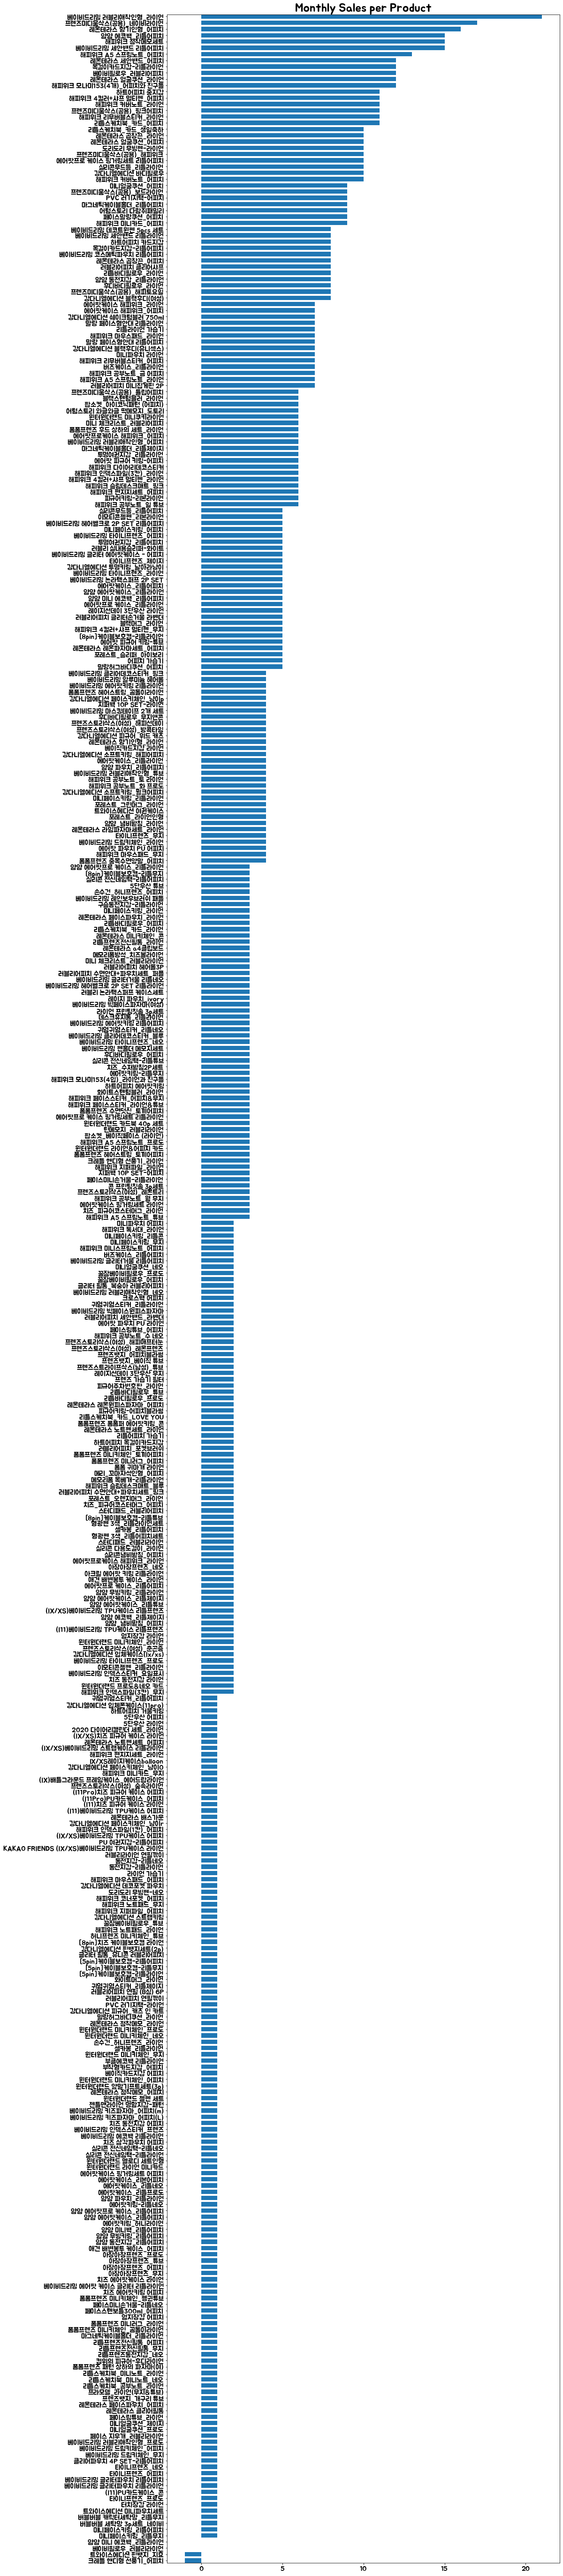

In [154]:
#monthly_sale.plot(kind="barh")
import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\\Users\\Joanna Kang\\AppData\\Local\\Microsoft\\Windows\\Fonts\\BMJUA_ttf.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = [15, 100]
#fig = plt.figure(figsize=(12, 100))
#ax = fig.add_subplot(111)

x = []
y = []

for i in range(len(monthly_sale.index)):
    x.append(monthly_sale.index[i])
    y.append(monthly_sale[7][i])

plt.barh(x, y, height=0.7) 
plt.tick_params(labelsize = 15)
plt.margins(y=0)
plt.title('Monthly Sales per Product', fontsize = 25)

plt.show()

In [156]:
#각 주차 별 동일한 기준인지 체크
weekcheck = julysale[['day','dayofweek']]
weekcheck = weekcheck.drop_duplicates()
weekcheck['dayofweek'].value_counts()

30    7
29    7
28    7
27    5
Name: dayofweek, dtype: int64

In [157]:
julysale

product_title       SKU        day  \
0     Baby Dreaming Theme, Plush Headband - Little A...    F10613 2020-07-24   
1              Happy Weeks, Removable Stickers - Apeach    F10751 2020-07-03   
2      KANGDANIEL EDITION, Plush Keyring - Happy Apeach    F10486 2020-07-01   
3     Happy Weeks, Multi Coloured Pen, 4 Colours & M...    F10761 2020-07-02   
4                       Cake Card - Apeach, Ryan, Frodo  93008556 2020-07-03   
...                                                 ...       ...        ...   
1381                     Silicone Hanging Holder - Ryan    F09645 2020-07-17   
1382                            Metal Pin Badges - Tube  93008640 2020-07-06   
1383            Happy Weeks, Ruled Note - Friday Apeach    F10729 2020-07-06   
1384                          Hoodie Body Pillow - Ryan    F10691 2020-07-13   
1385                      Humidifier Filters, Pack of 3    F08961 2020-07-13   

      pos_location_name  net_quantity  gross_sales  discounts  returns  \
0                   NaN             5        66.60     -26.63     0.00   
1                   NaN             4        17.05      -5.11     0.00   
2                   NaN             4        30.32       0.00     0.00   
3                   NaN             4        26.63      -7.99     0.00   
4                   NaN             4         8.51       0.00     0.00   
...                 ...           ...          ...        ...      ...   
1381                NaN            -1         0.00       0.00    -9.58   
1382                NaN            -1         0.00       0.00    -5.16   
1383                NaN            -1         0.00       0.00    -6.03   
1384                NaN            -1         0.00       0.00   -23.32   
1385                NaN            -2         0.00       0.00    -8.15   

      net_sales  taxes  ...     SKU_2      ASIN_2          CHARACTER  \
0         39.97   8.00  ...    F10613  B0883BXBYD             Apeach   
1         11.94   2.03  ...    F10751  B084JSM6YB             Apeach   
2         30.32   6.04  ...    F10486           0             Apeach   
3         18.64   3.73  ...    F10761  B084JMJSBS             Apeach   
4          8.51   1.45  ...  93008556  B07QVJLFL2  Ryan, Apeach, Con   
...         ...    ...  ...       ...         ...                ...   
1381      -9.58  -1.91  ...    F09645  B07TS2GK3T               Ryan   
1382      -5.16  -0.83  ...  93008640  B07PZY3C18               Tube   
1383      -6.03  -0.96  ...    F10729  B084JP5RK5             Apeach   
1384     -23.32  -4.67  ...    F10691  B084MF4KPN               Ryan   
1385      -8.15  -1.63  ...    F08961        None                  -   

               CATEGORY               ITEM           THEME  \
0                  Bath          Hairbands   Baby Dreaming   
1            Stationery           Stickers     Happy Weeks   
2           Accessories           Keyrings     Kang Daniel   
3            Stationery                Pen     Happy Weeks   
4            Stationery      Message Cards  Little Friends   
...                 ...                ...             ...   
1381  Kitchen & Laundry    Silicone Holder           Basic   
1382        Accessories          Pin badge           Basic   
1383         Stationery           Notepads     Happy Weeks   
1384             Living        Body Pillow           Basic   
1385               Home  Humidifier Filter           Basic   

         PRODUCT_NAME(KR) dayofweek  year month  
0       베이비드리밍 세안밴드 리틀어피치        30  2020     7  
1        해피위크 리무버블스티커_어피치        27  2020     7  
2     강다니엘에디션 소프트키링_해피어피치        27  2020     7  
3     해피위크 4컬러+샤프 멀티펜_어피치        27  2020     7  
4          리틀스케치북_카드_생일축하        27  2020     7  
...                   ...       ...   ...   ...  
1381        실리콘 다용도걸이_라이언        29  2020     7  
1382         프렌즈뱃지_베이직 튜브        28  2020     7  
1383      해피위크 공부노트_금 어피치        28  2020     7  
1384          후디바디필로우_라이언        29  2020     7  
1385           프렌즈 가습기 필터       

In [158]:
july_week = julysale[julysale['dayofweek'] == 27]
july_week = july_week['day']
july_week = july_week.drop_duplicates()
july_week = july_week.sort_index(ascending = True)
july_week
#df[df['컬럼이름'] == '특정값']
#sale.sort_values(by='purchase-date')

1    2020-07-03
2    2020-07-01
3    2020-07-02
8    2020-07-05
48   2020-07-04
Name: day, dtype: datetime64[ns]

In [167]:
category_overall

dayofweek          27  28  29   30
CATEGORY                          
Accessories        86  65  54   91
Stationery         98  50  66  132
Tech&Accs          46  50  36   74
Living             41  42  22   53
Plush              61  40  34   61
Bath               12  17   3   12
Beauty             10  15   5   19
Home               10  13   2    9
Travel             14   8   7   17
Kitchen & Laundry   0   0   3   12
Pet                 3   0   0    0
Summer              0   0   0    3
Toys                3   0   1    3
Winter              3   0   3    0

In [168]:
theme_overall

dayofweek          27  28  29   30
THEME                             
Happy Weeks        68  54  70  113
Little Friends     73  63  52  111
Baby Dreaming      43  44  17   63
Basic              69  38  22   55
Lemon Terras       31  25  21   45
Lovely Apeach      16  13   9   19
Yamyam Friends     10   5  11   17
Winter Wonderland   2   2   6   14
Cheeze Friends      3   3   2   10
Pompom Friends      7  10   7    8
Kang Daniel        36  14   4    8
Heart Apeach        9   6   2    8
Forest Ryan         4   6   2    6
Lazy Sunday         3   3   2    3
Lovely Ryan         4   1   3    2
Honey Friends       0   5   0    1
Little friends      1   3   0    1
Gentlemen Ryan      0   0   0    1
Autumn Story        5   4   5    1
Twice               2   1   1    0
Battle Ground       1   0   0    0

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# heatmap by plt.pcolor()
def heatmap (chart, title, chartsize, title_size, label_size, colorbar):
    #plt.rcParams['figure.figsize'] = [chartsize, chartsize]
    plt.pcolor(chart)
    plt.xticks(np.arange(0.5, len(chart.columns), 1), chart.columns)
    plt.yticks(np.arange(0.5, len(chart.index), 1), chart.index)
    plt.title(title, fontsize=title_size)
    plt.xlabel('Week', fontsize=label_size)
    #plt.ylabel('Category', fontsize=font_size)
    #if legend:
    #    plt.colorbar()
    plt.tick_params(labelsize = label_size)
    sns.heatmap(chart, annot=True, cmap ='YlGnBu', annot_kws={"fontsize":title_size}, cbar = colorbar, fmt = 'd')

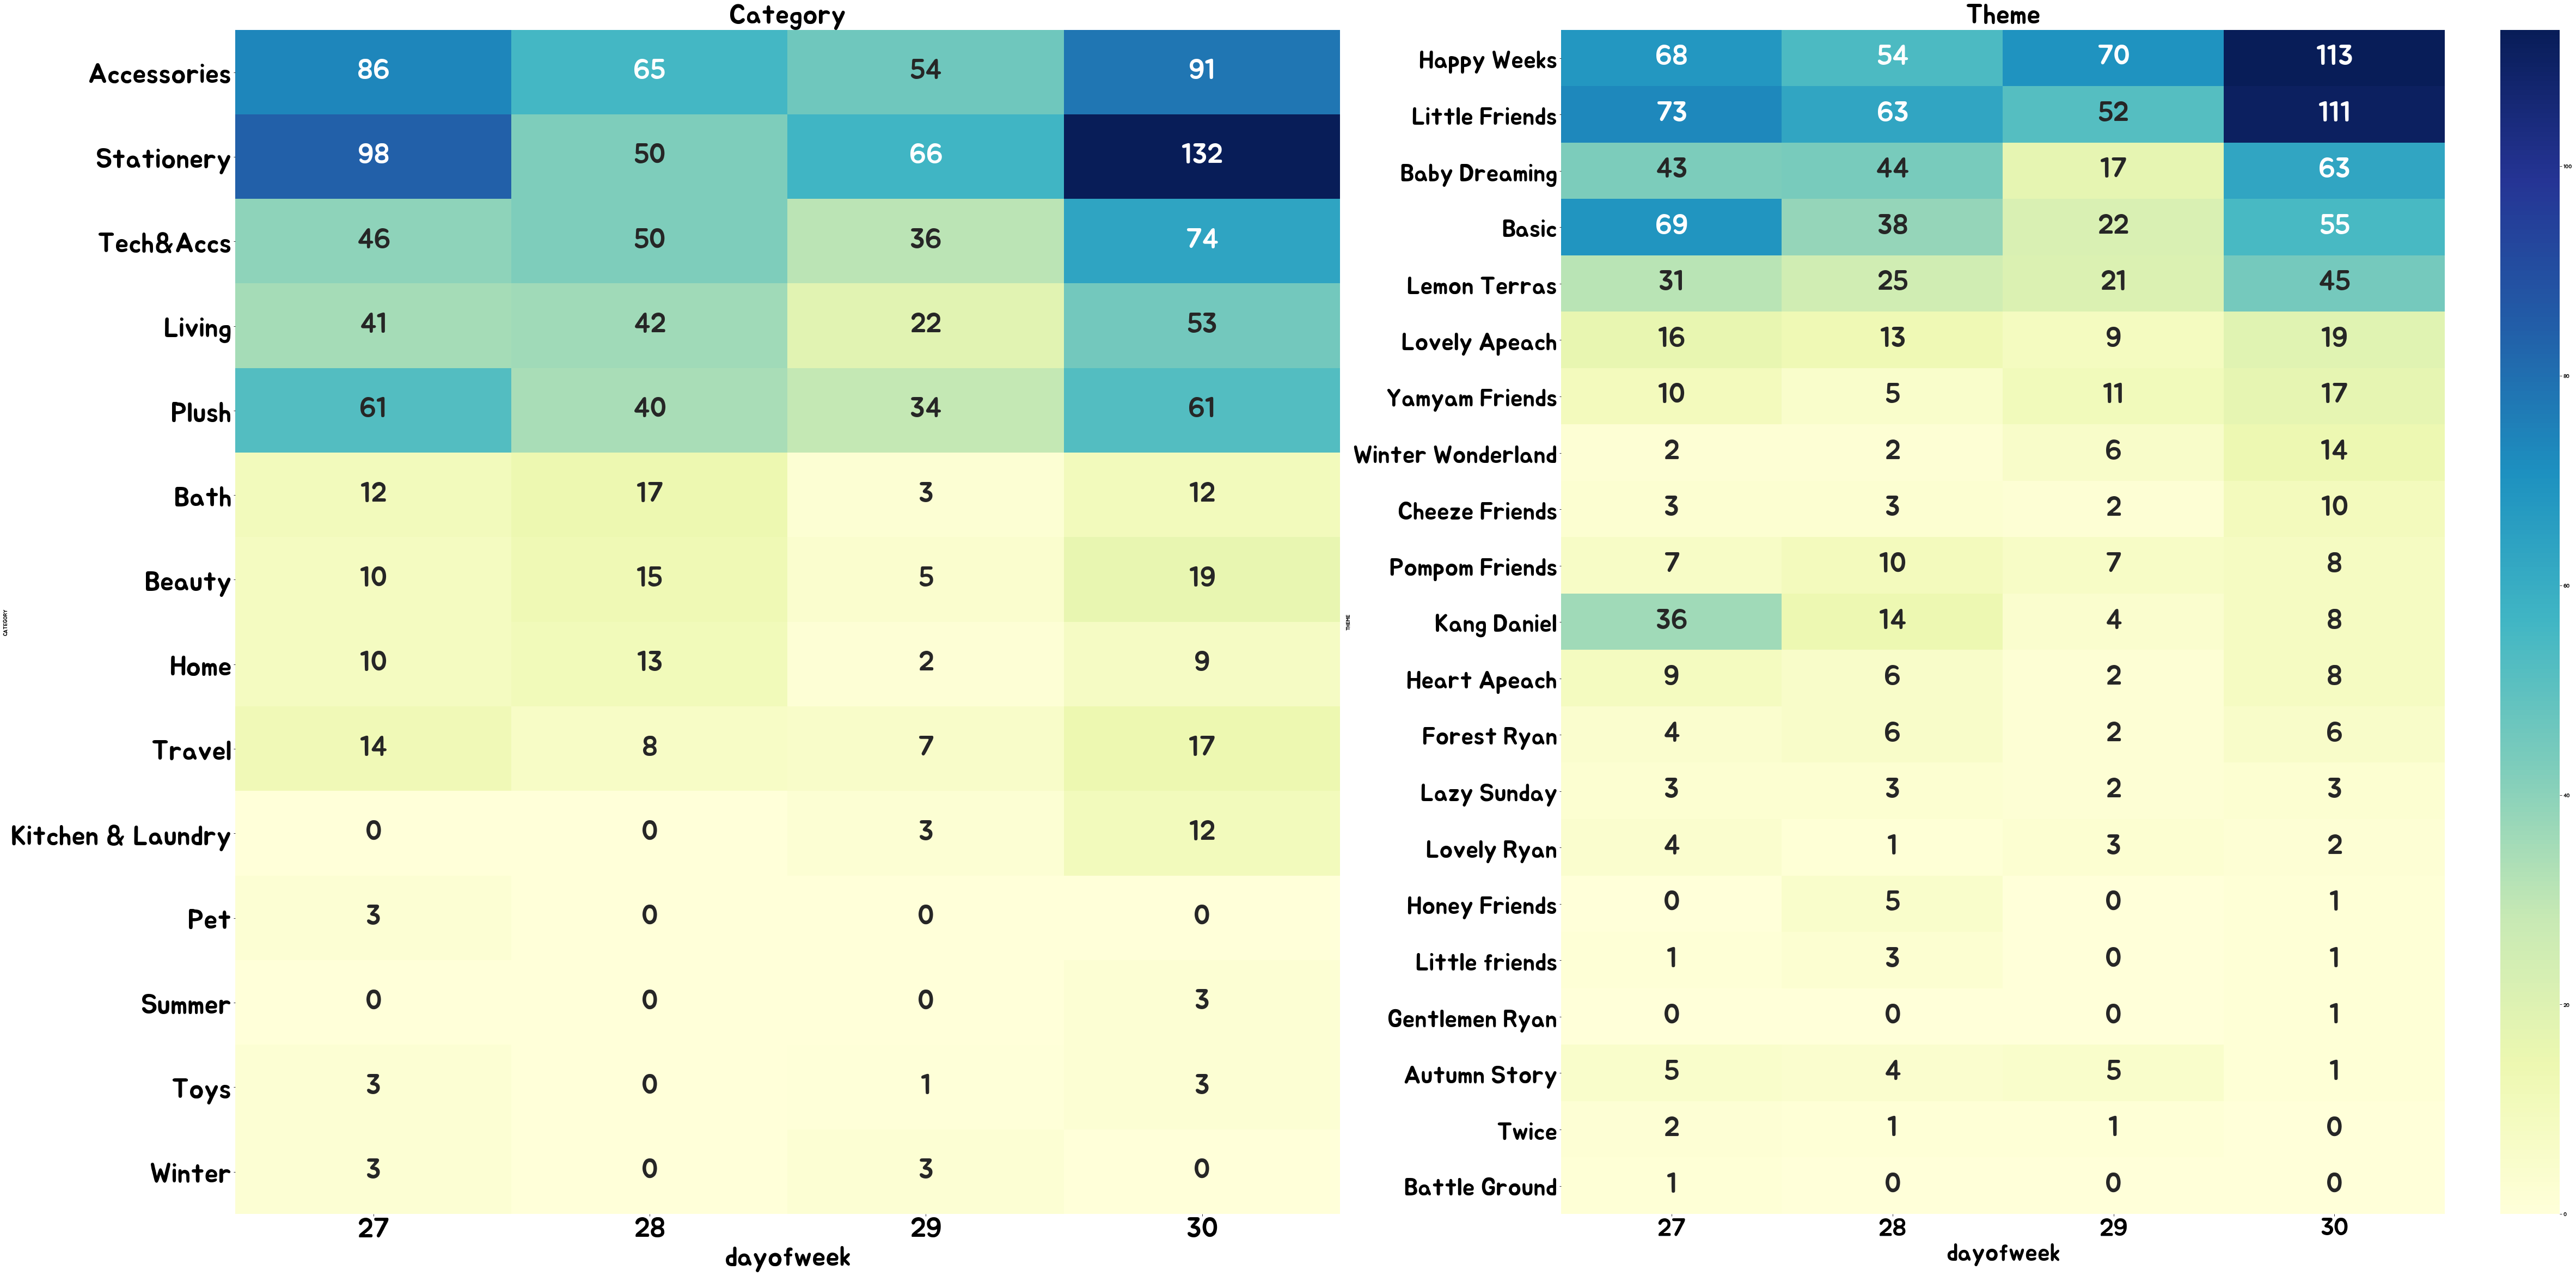

In [182]:
plt.rcParams['figure.figsize'] = [80, 40]


plt.subplot(1,2,1)
category_overall_heatmap = heatmap(category_overall, 'Category', 40, 50, 50, False)

plt.subplot(1,2,2) 
theme_overall_heatmap = heatmap(theme_overall, 'Theme', 40, 50, 45, True)



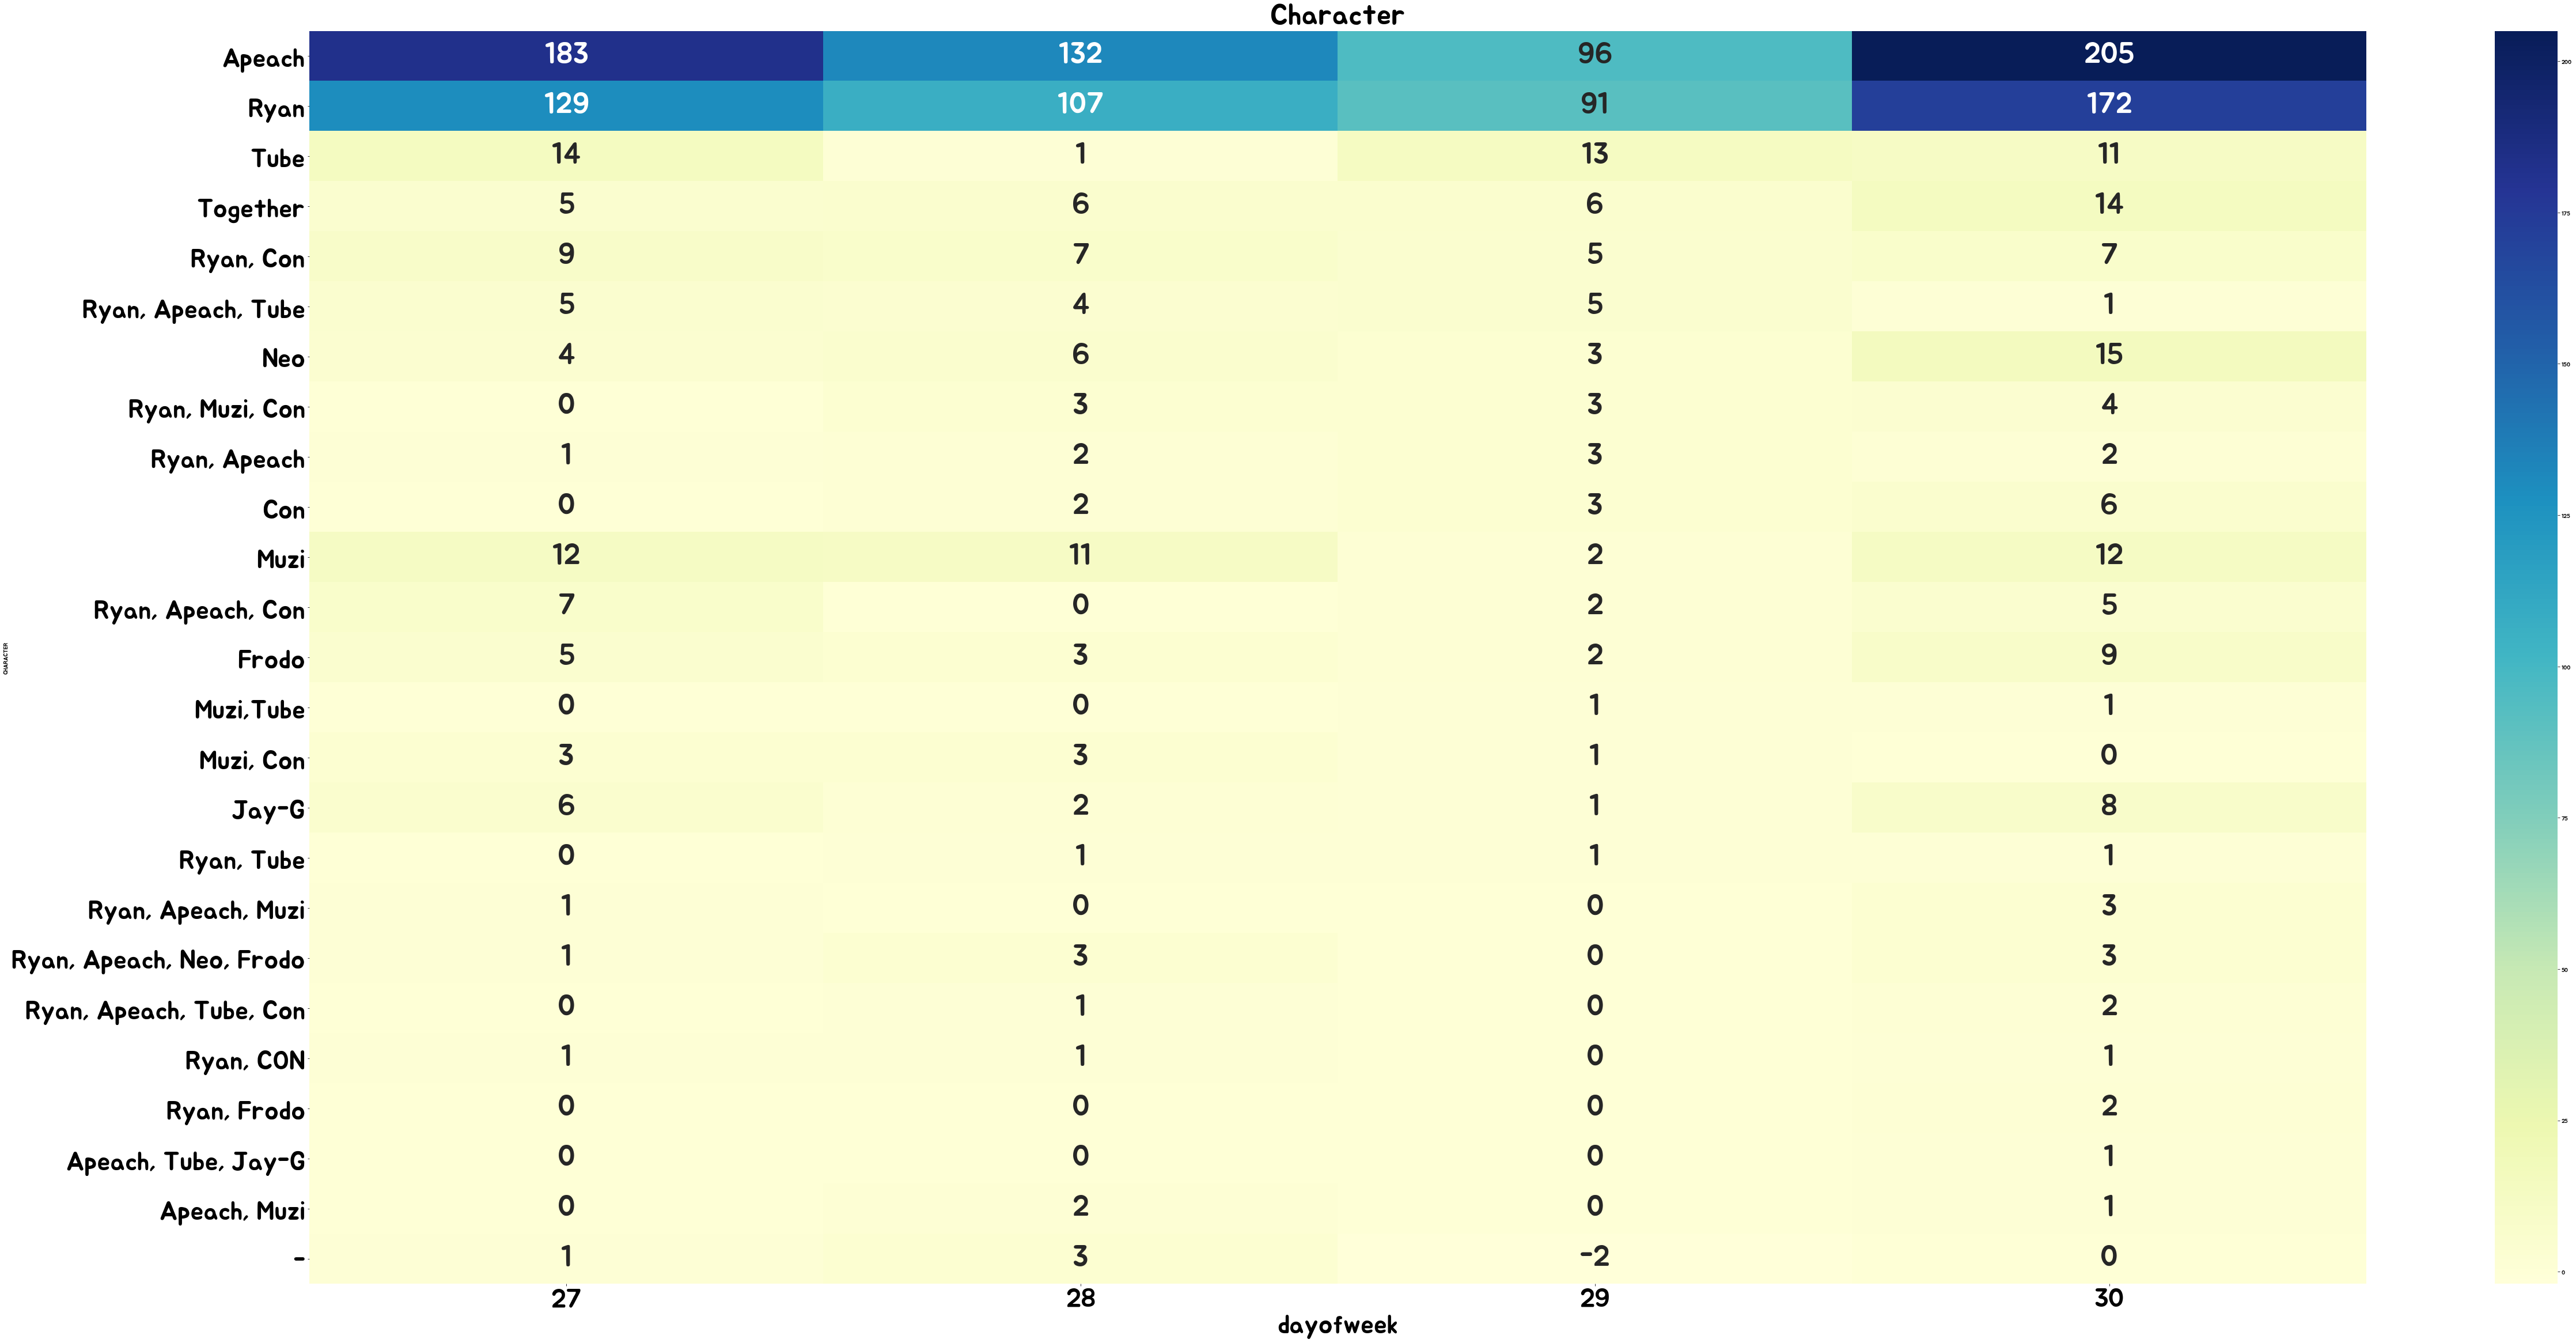

In [184]:
character_overall_heatmap = heatmap(character_overall, 'Character', 40, 50, 45, True)
